### Table of Contents

#### [ EDA ](#eda)

   * [1. Univariate analysis](#uni)
   
     * [1.1 for categorical features](#unicat)
     * [1.2 for numerical features](#uninum)
     
     
   * [2. Biivariate analysis](#bi)
   
     * [2.1 between categorical and categorical features](#bicatcat)
     * [2.2 between nemerical and numerical features](#binumnum)
     * [2.3 between categorical and numerical features](#bicatnum)
     

   * [3. Multivariate analysis](#mul)

#### no outlier removel step in this code because it contain only eda analysis by using you get clear understanding of  data  relations in this dataset  and the amount of data is very less , so outlier consider depends upon which model is uses for pridiction

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/laptop-dataset/laptop.csv
/kaggle/input/laptop-dataset/laptop_eda.csv
/kaggle/input/laptop-dataset/laptop_data.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv('/kaggle/input/laptop-dataset/laptop.csv')
df

,Company,TypeName,Ram,OpSys,Weight,Touchscreen,CpuCompany,ClockSpeed,Flash Storage,HDD,Hybrid,SSD,GPU,Ppi,Price
0,Apple,Ultrabook,8,macOS,1.37,0,Intel,2.3,0.000,0.0,0.0,0.128,Intel,312.781955,71378.6832
1,Apple,Ultrabook,8,macOS,1.34,0,Intel,1.8,0.128,0.0,0.0,0.000,Intel,175.939850,47895.5232
2,HP,Notebook,8,No,1.86,0,Intel,2.5,0.000,0.0,0.0,0.256,Intel,192.307692,30636.0000
3,Apple,Ultrabook,16,macOS,1.83,0,Intel,2.7,0.000,0.0,0.0,0.512,AMD,303.896104,135195.3360
4,Apple,Ultrabook,8,macOS,1.37,0,Intel,3.1,0.000,0.0,0.0,0.256,Intel,312.781955,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Windows,1.80,1,Intel,2.5,0.000,0.0,0.0,0.128,Intel,214.285714,33992.6400
1299,Lenovo,2 in 1 Convertible,16,Windows,1.30,1,Intel,2.5,0.000,0.0,0.0,0.512,Intel,375.939850,79866.7200
1300,Lenovo,Notebook,2,Windows,1.50,0,Intel,1.6,0.064,0.0,0.0,0.000,Intel,152.428571,12201.1200
1301,HP,Notebook,6,Windows,2.19,0,Intel,2.5,0.000,1.0,0.0,0.000,AMD,136.794872,40705.9200


**data Discovery**

In [4]:
df.shape

(1303, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1303 non-null   object 
 1   TypeName       1303 non-null   object 
 2   Ram            1303 non-null   int64  
 3   OpSys          1303 non-null   object 
 4   Weight         1303 non-null   float64
 5   Touchscreen    1303 non-null   int64  
 6   CpuCompany     1303 non-null   object 
 7   ClockSpeed     1303 non-null   float64
 8   Flash Storage  1303 non-null   float64
 9   HDD            1303 non-null   float64
 10  Hybrid         1303 non-null   float64
 11  SSD            1303 non-null   float64
 12  GPU            1303 non-null   object 
 13  Ppi            1303 non-null   float64
 14  Price          1303 non-null   float64
dtypes: float64(8), int64(2), object(5)
memory usage: 152.8+ KB


In [6]:
df.dtypes

Company           object
TypeName          object
Ram                int64
OpSys             object
Weight           float64
Touchscreen        int64
CpuCompany        object
ClockSpeed       float64
Flash Storage    float64
HDD              float64
Hybrid           float64
SSD              float64
GPU               object
Ppi              float64
Price            float64
dtype: object

**number of rows = 1303**

**number of columns  = 15**

**number of cateorical features = 5**

**number of numerical features = 10**

**number of columns occuring null value = 0**

# EDA <a class="anchor"  id="eda"></a>

Exploratory Data Analysis (EDA) is a crucial initial step in data analysis that involves examining, summarizing, and visualizing a dataset to uncover patterns, trends, relationships, and potential outliers. EDA helps analysts understand the characteristics of the data before applying more complex statistical techniques. It's a process of getting acquainted with the data to make informed decisions about subsequent analysis steps.

## 1. Univariate analysis <a class="anchor"  id="uni"></a>

Univariate analysis is a fundamental statistical technique used to analyze and understand individual variables in isolation. It involves exploring the distribution, central tendency, spread, and characteristics of a single variable without considering the relationships with other variables. Univariate analysis is particularly useful for gaining insights into the characteristics of a dataset and identifying patterns or outliers within individual variables.

In [7]:
# spliting df to  categorical and numerical

numeric = df.select_dtypes(include=[np.int64,np.float64])
categorical = df.select_dtypes(include=[np.object_])

### 1.1 **for Categorical** <a class="anchor"  id="unicat"></a>

In [8]:
categorical.columns

Index(['Company', 'TypeName', 'OpSys', 'CpuCompany', 'GPU'], dtype='object')

#### **Company**

<BarContainer object of 19 artists>

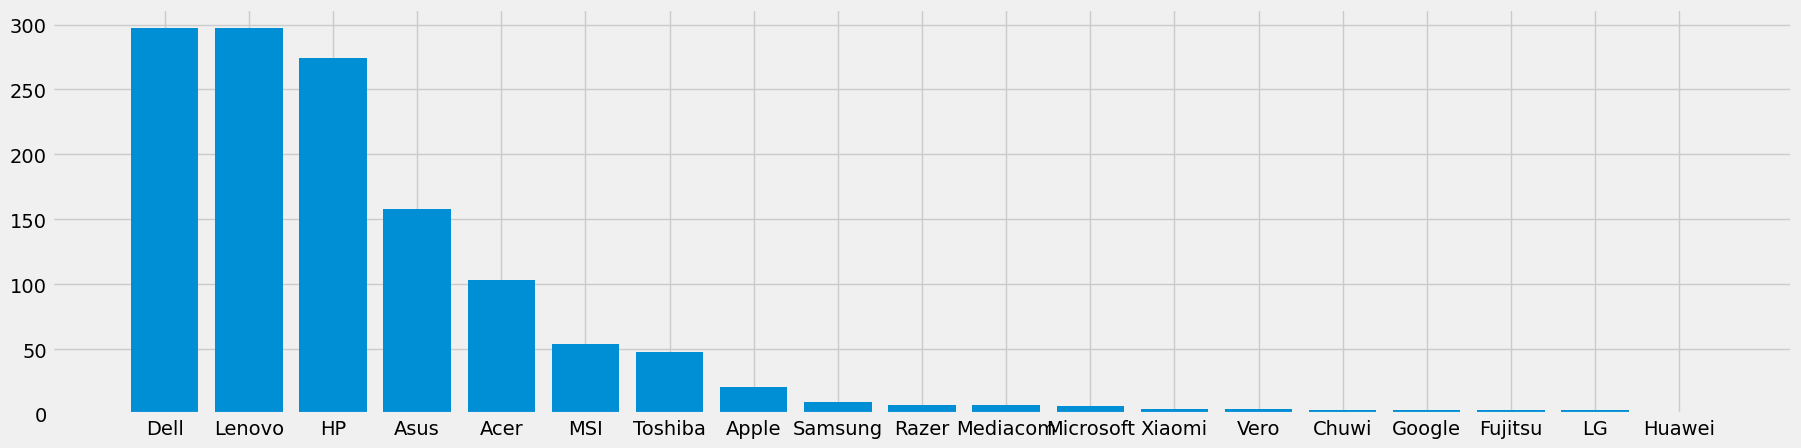

In [9]:
plt.figure(figsize=(20,5))
company_counts = categorical.Company.value_counts()
plt.bar(company_counts.index,company_counts.values)

In [10]:
company_counts

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

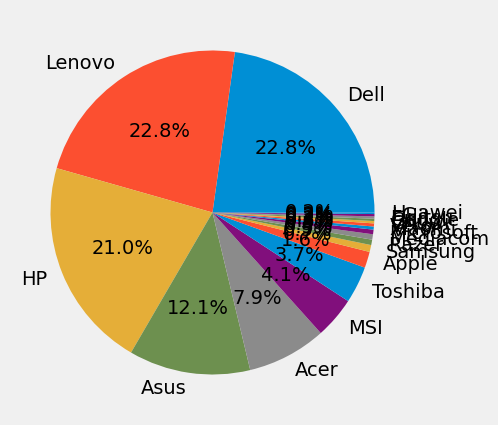

In [11]:
plt.figure(figsize=(30,5))
plt.pie(company_counts,labels=company_counts.index,
       autopct = '%0.1f%%')
plt.show()

**all the company has less than or equal to 0.5% of occurance that all combine to single name 'others'**

In [12]:
m = {i:'others' for i in company_counts.index if company_counts[i] <= 7 }
categorical.Company = categorical.Company.replace(m)

<BarContainer object of 10 artists>

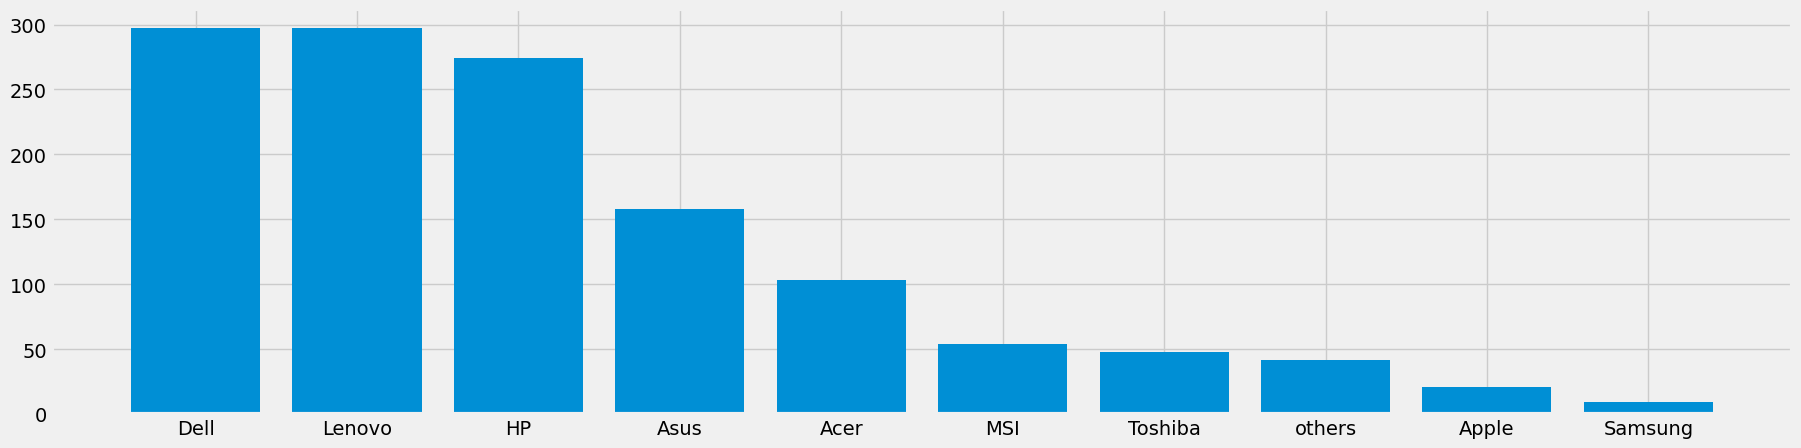

In [13]:
plt.figure(figsize=(20,5))
company_counts = categorical.Company.value_counts()
plt.bar(company_counts.index,company_counts.values)

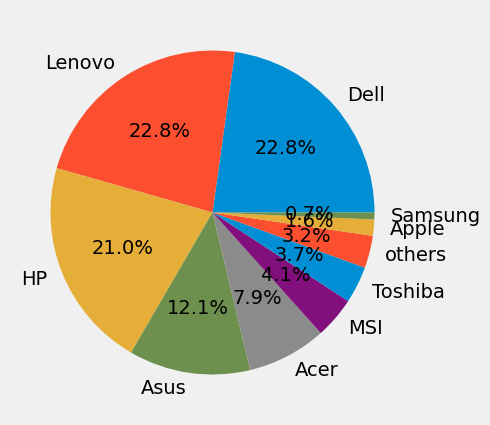

In [14]:
plt.figure(figsize=(20,5))
plt.pie(company_counts,labels=company_counts.index,
       autopct = '%0.1f%%')
plt.show()

#### **TypeName**

In [15]:
categorical.TypeName.value_counts()

Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: TypeName, dtype: int64

<BarContainer object of 6 artists>

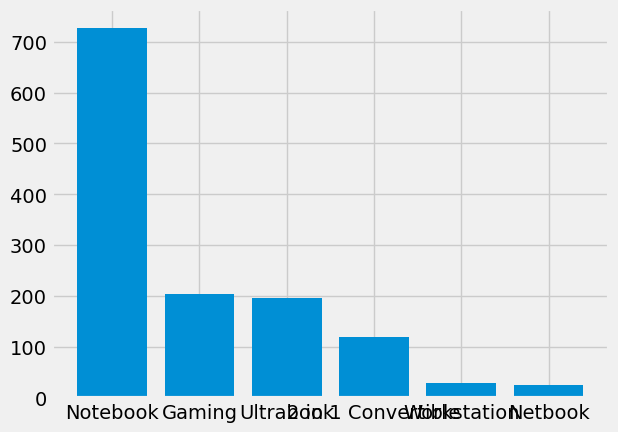

In [16]:
type_count = categorical.TypeName.value_counts()
plt.bar(type_count.index,type_count.values)

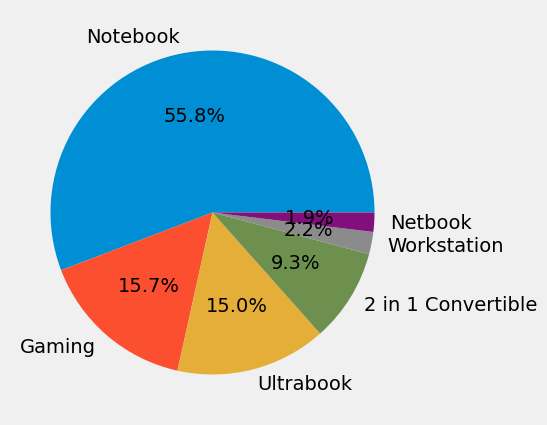

In [17]:
plt.figure(figsize=(20,5))
plt.pie(type_count,labels=type_count.index,
       autopct = '%0.1f%%')
plt.show()

#### **OpSys**

In [18]:
categorical.OpSys.value_counts()

Windows    1125
No           66
Linux        62
Chrome       27
macOS        13
Mac           8
Android       2
Name: OpSys, dtype: int64

<BarContainer object of 7 artists>

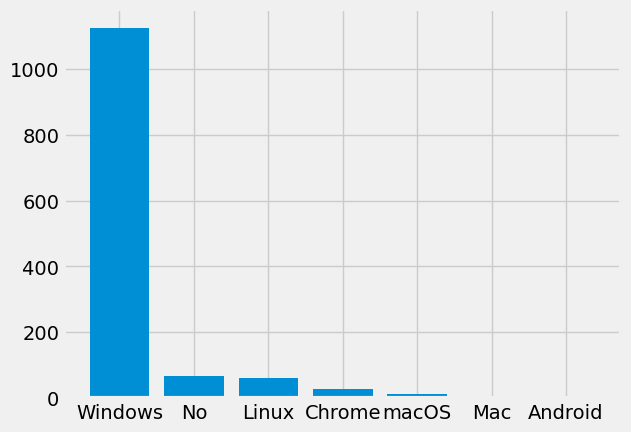

In [19]:
os_counts = categorical.OpSys.value_counts()
plt.bar(os_counts.index,os_counts)

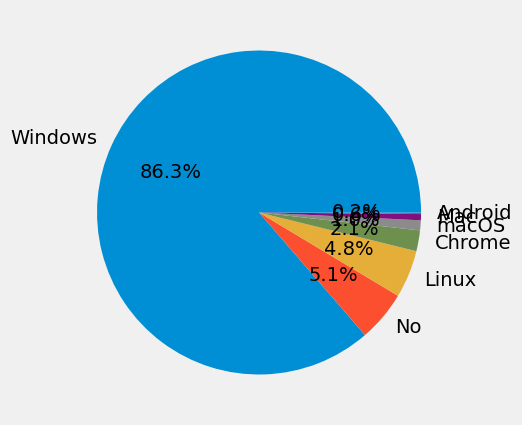

In [20]:
plt.figure(figsize=(20,5))
plt.pie(os_counts,labels=os_counts.index,
       autopct = '%0.1f%%')
plt.show()

mac and macos are same so changes into same 

In [21]:
categorical.OpSys.replace('macOS','Mac',inplace=True)

<BarContainer object of 6 artists>

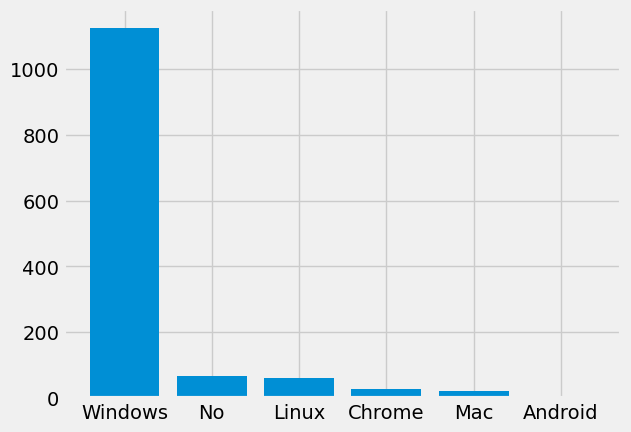

In [22]:
os_counts = categorical.OpSys.value_counts()
plt.bar(os_counts.index,os_counts)

In [23]:
categorical.OpSys.value_counts()

Windows    1125
No           66
Linux        62
Chrome       27
Mac          21
Android       2
Name: OpSys, dtype: int64

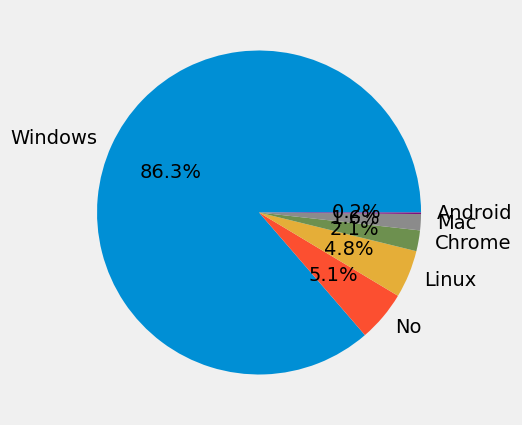

In [24]:
plt.figure(figsize=(20,5))
plt.pie(os_counts,labels=os_counts.index,
       autopct = '%0.1f%%')
plt.show()

only 2 record has an Android so drop that column

In [25]:
ind = [*categorical[categorical['OpSys']=='Android'].index] 
categorical.drop(ind,inplace=True)
numeric.drop(ind,inplace=True)

    

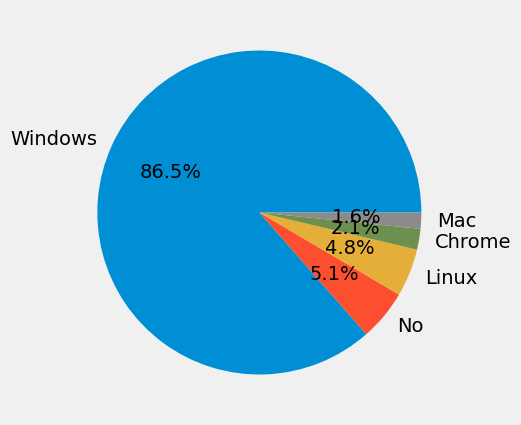

In [26]:
os_counts = categorical.OpSys.value_counts()
plt.figure(figsize=(20,5))
plt.pie(os_counts,labels=os_counts.index,
       autopct = '%0.1f%%')
plt.show()

#### **Cpucompany**

<BarContainer object of 3 artists>

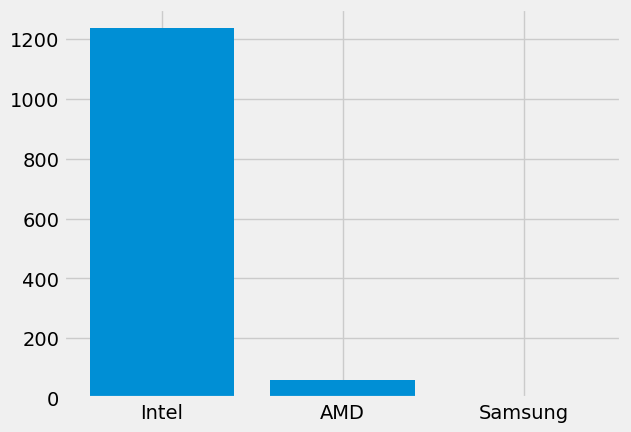

In [27]:
cpu_counts = categorical.CpuCompany.value_counts()
plt.bar(cpu_counts.index,cpu_counts)

In [28]:
ind = [*categorical[categorical.CpuCompany == 'Samsung'].index]
categorical.drop(ind,inplace=True)
numeric.drop(ind,inplace=True)

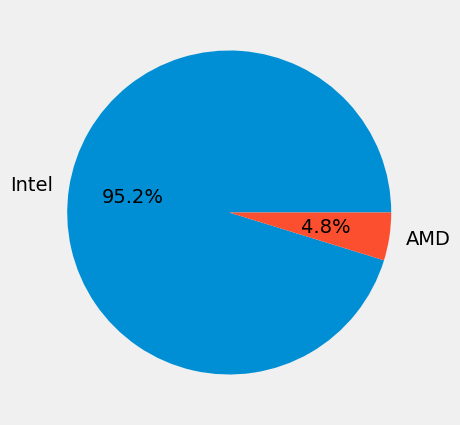

In [29]:
cpu_counts = categorical.CpuCompany.value_counts()
plt.figure(figsize=(20,5))
plt.pie(cpu_counts,labels=cpu_counts.index,
       autopct = '%0.1f%%')
plt.show()

#### **GPU**

<BarContainer object of 3 artists>

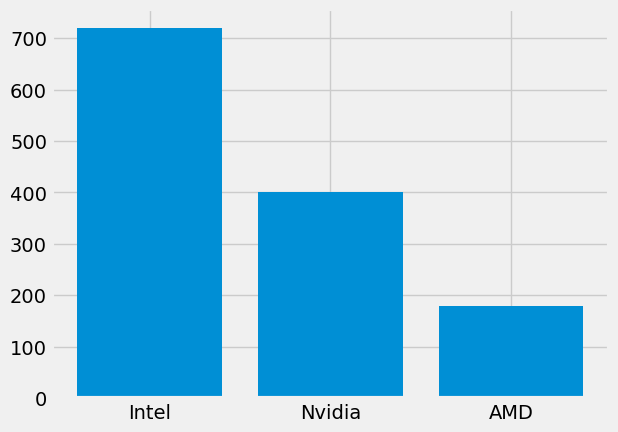

In [30]:
gpu_counts = categorical.GPU.value_counts()
plt.bar(gpu_counts.index,gpu_counts.values)

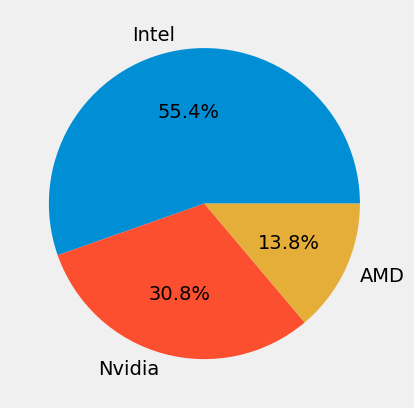

In [31]:
plt.pie(gpu_counts,labels = gpu_counts.index,
       autopct='%.1f%%')
plt.show()

In [32]:
categorical.describe()

,Company,TypeName,OpSys,CpuCompany,GPU
count,1300,1300,1300,1300,1300
unique,10,6,5,2,3
top,Dell,Notebook,Windows,Intel,Intel
freq,297,727,1125,1238,720


### 1.2 **Numerical** <a class="anchor"  id="uninum"></a>

In [33]:
numeric.columns

Index(['Ram', 'Weight', 'Touchscreen', 'ClockSpeed', 'Flash Storage', 'HDD',
       'Hybrid', 'SSD', 'Ppi', 'Price'],
      dtype='object')

#### **Ram**

In [34]:
numeric.Ram.describe()

count    1300.000000
mean        8.392308
std         5.086165
min         2.000000
25%         4.000000
50%         8.000000
75%         8.000000
max        64.000000
Name: Ram, dtype: float64

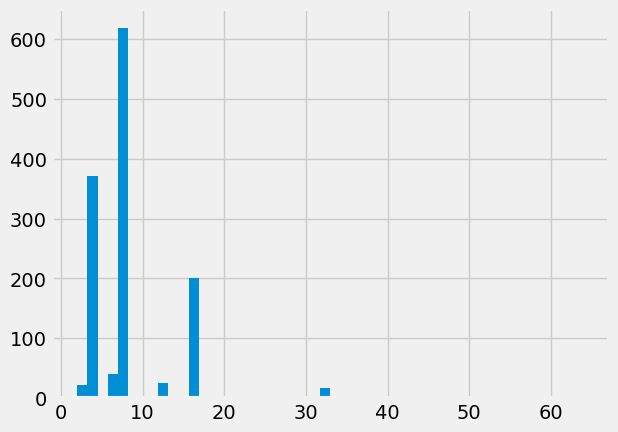

In [35]:
plt.hist(numeric.Ram,bins=50)
plt.show()

In [36]:
numeric.Ram.value_counts()

8     619
4     372
16    200
6      41
12     25
2      22
32     17
24      3
64      1
Name: Ram, dtype: int64

Ram is numeric values but not continuous , so we plot as a categorical features

<Axes: xlabel='Ram', ylabel='count'>

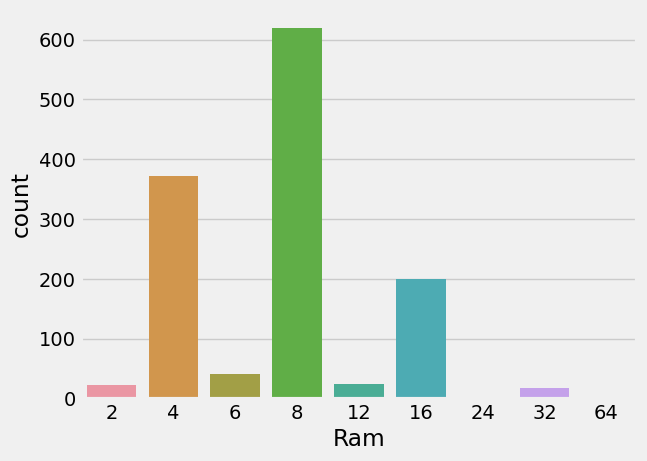

In [37]:
sns.countplot(x='Ram',data=numeric)

#### **Weight**

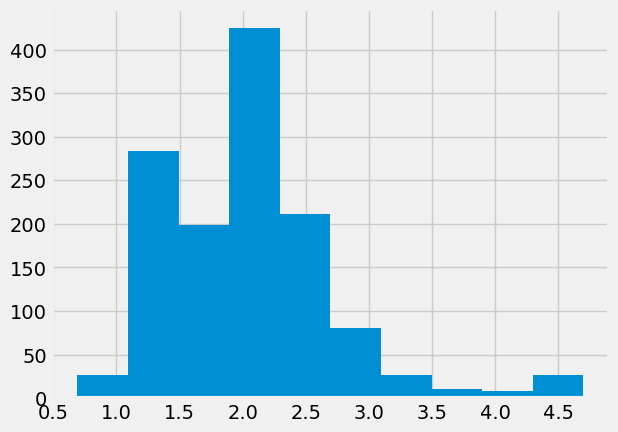

In [38]:
plt.hist(numeric.Weight)
plt.show()

<Axes: xlabel='Weight', ylabel='Density'>

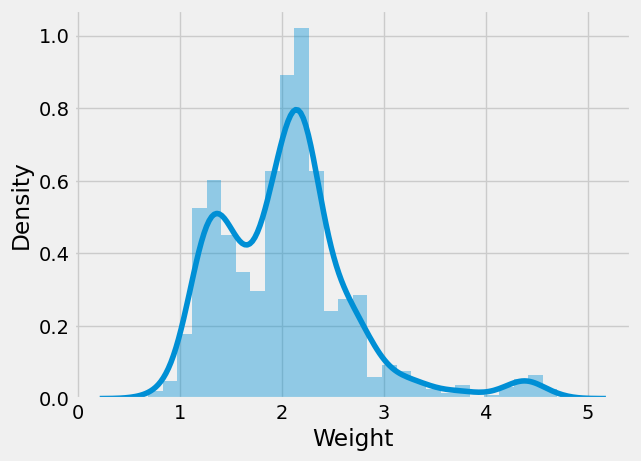

In [39]:
sns.distplot(numeric.Weight)

In [40]:
numeric.Weight.nunique()

171

weight is contains some outliers  but we do not remove at this stage

In [41]:
numeric.columns

Index(['Ram', 'Weight', 'Touchscreen', 'ClockSpeed', 'Flash Storage', 'HDD',
       'Hybrid', 'SSD', 'Ppi', 'Price'],
      dtype='object')

#### **Touchscreen**

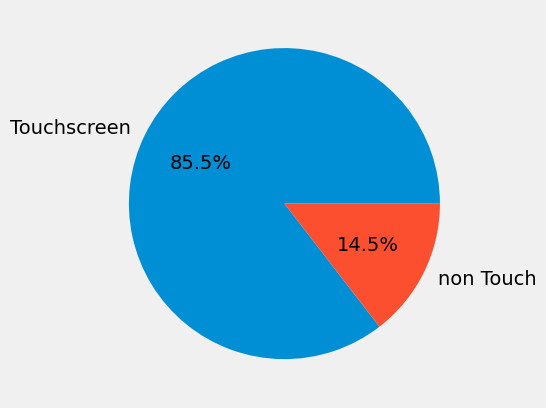

In [42]:
plt.pie(numeric.Touchscreen.value_counts(),
       autopct='%.1f%%',
       labels=['Touchscreen','non Touch'])
plt.show()

#### **ClockSpeed**

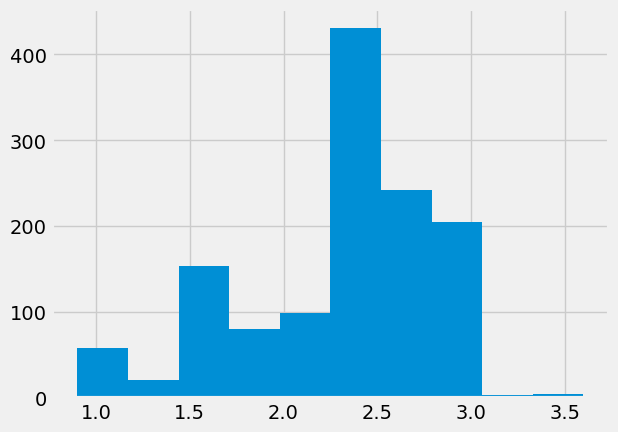

In [43]:
plt.hist(numeric.ClockSpeed)
plt.show()

In [44]:
numeric.ClockSpeed.nunique()

25

<Axes: xlabel='ClockSpeed', ylabel='Density'>

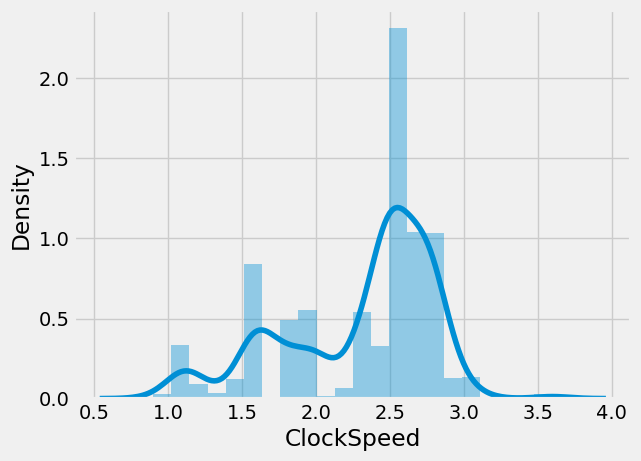

In [45]:
sns.distplot(numeric.ClockSpeed)

clockspeed also has some skewness 

#### **Flash Storage**

In [46]:
numeric['Flash Storage'].value_counts()

0.000    1228
0.032      37
0.064      14
0.256       8
0.016       7
0.128       4
0.512       2
Name: Flash Storage, dtype: int64

<Axes: xlabel='Flash Storage', ylabel='count'>

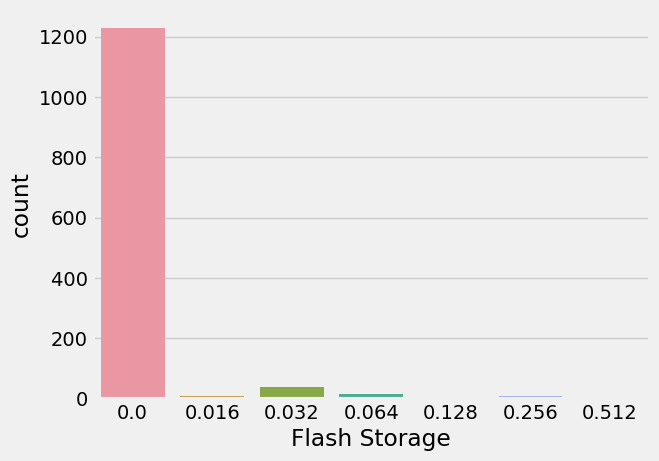

In [47]:
sns.countplot(x='Flash Storage',data=numeric)

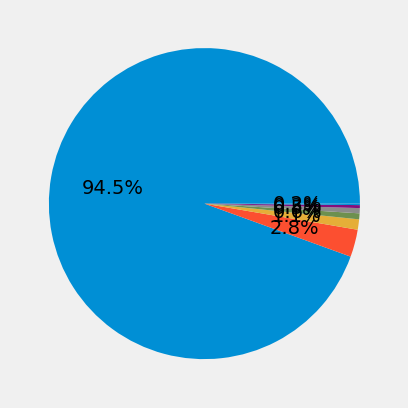

In [48]:
plt.pie(numeric['Flash Storage'].value_counts(),
       autopct='%.1f%%')
plt.show()

majority of laptop have no flash storage so ,drop this column 

In [49]:
numeric.drop(['Flash Storage'],axis=1,inplace=True)

#### **HDD**

<Axes: xlabel='HDD', ylabel='count'>

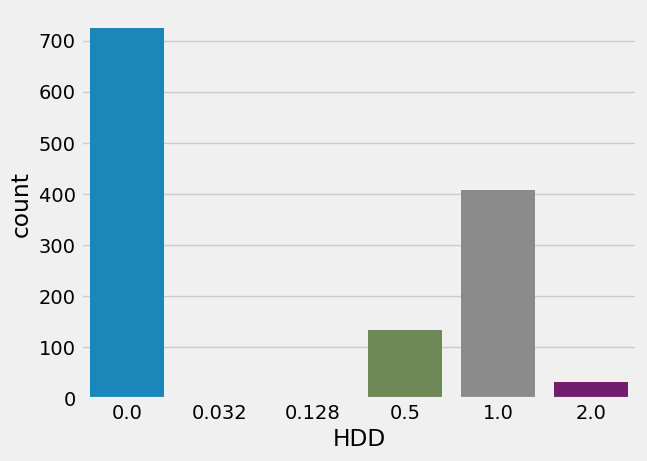

In [50]:
sns.countplot(x='HDD',data=numeric)

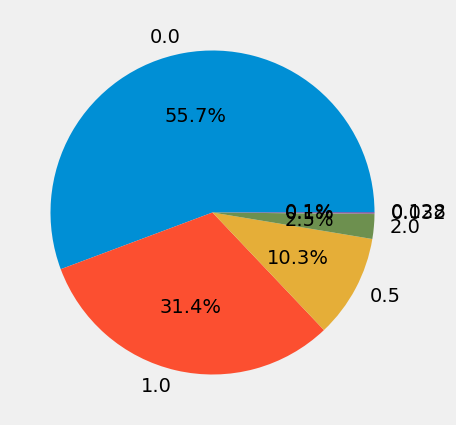

In [51]:
plt.figure(figsize = (10,5
                     ))
plt.pie(numeric.HDD.value_counts(),labels=numeric.HDD.value_counts().index,
       autopct='%.1f%%')
plt.show()

#### **Hybrid**

<Axes: xlabel='Hybrid', ylabel='count'>

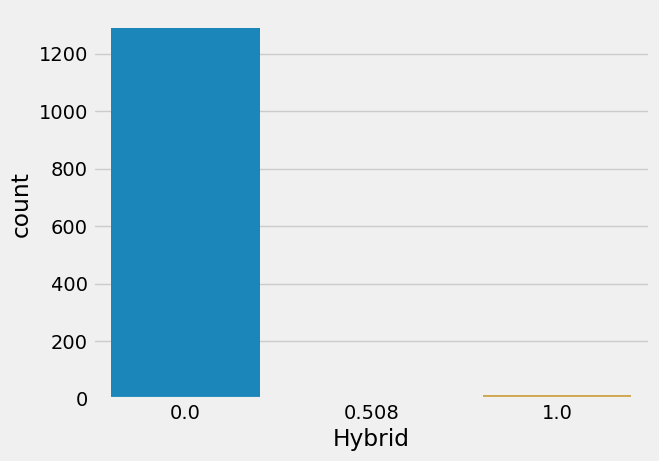

In [52]:
sns.countplot(x='Hybrid',data=numeric)

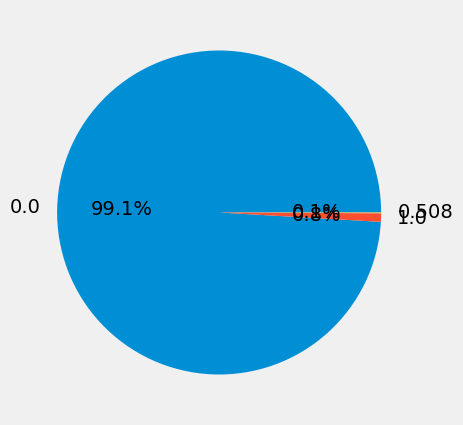

In [53]:
plt.figure(figsize = (10,5))
plt.pie(numeric.Hybrid.value_counts(),labels=numeric.Hybrid.value_counts().index,
       autopct='%.1f%%')
plt.show()

majority of laptop has no hybrid storage 

In [54]:
numeric.drop(['Hybrid'],axis = 1,inplace=True)

#### **SSD**

(array([468., 177., 499.,   0.,   0., 138.,   0.,   1.,   0.,  17.]),
 array([0.    , 0.1024, 0.2048, 0.3072, 0.4096, 0.512 , 0.6144, 0.7168,
        0.8192, 0.9216, 1.024 ]),
 <BarContainer object of 10 artists>)

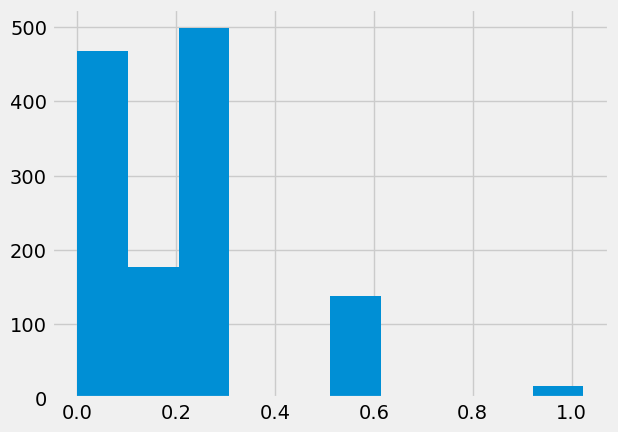

In [55]:
plt.hist(numeric.SSD)

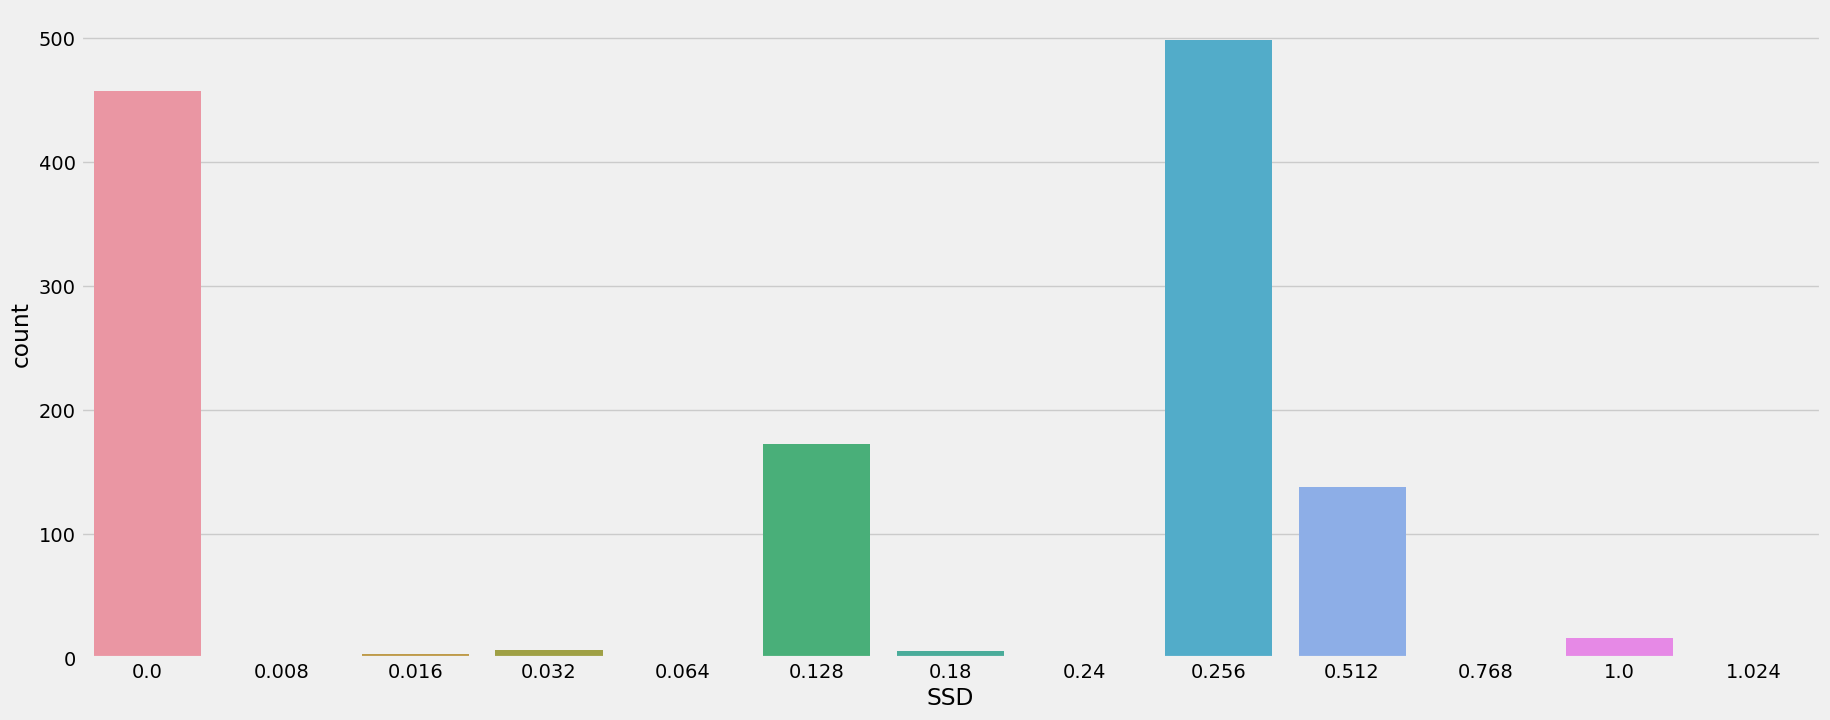

In [56]:
plt.figure(figsize =(20,8))
sns.countplot(x='SSD',data=numeric)
plt.show()

In [57]:
numeric.columns

Index(['Ram', 'Weight', 'Touchscreen', 'ClockSpeed', 'HDD', 'SSD', 'Ppi',
       'Price'],
      dtype='object')

#### **Ppi**

(array([283., 614., 252.,  30.,  28.,  22.,   8.,  50.,   2.,  11.]),
 array([123.35260116, 159.01734104, 194.68208092, 230.34682081,
        266.01156069, 301.67630058, 337.34104046, 373.00578035,
        408.67052023, 444.33526012, 480.        ]),
 <BarContainer object of 10 artists>)

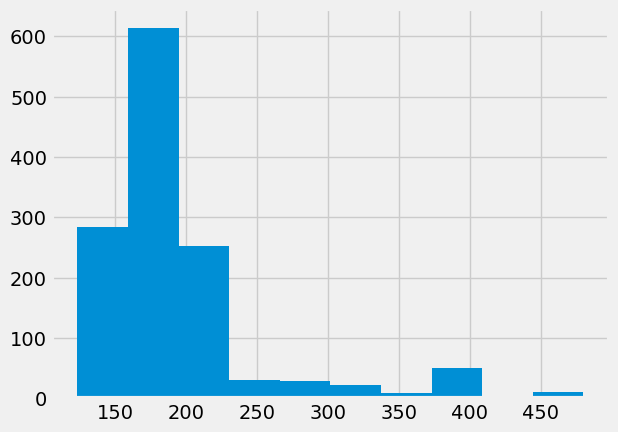

In [58]:
plt.hist(numeric.Ppi)

<Axes: xlabel='Ppi', ylabel='Density'>

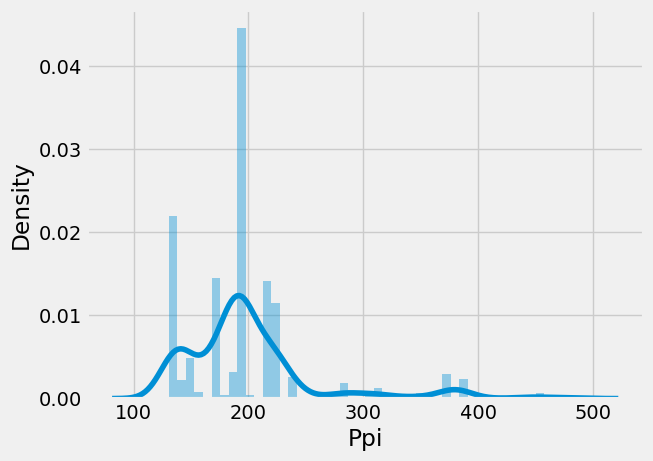

In [59]:
sns.distplot(numeric.Ppi)

#### **Price**

(array([471., 448., 231.,  98.,  37.,   8.,   3.,   2.,   1.,   1.]),
 array([  9270.72,  40839.12,  72407.52, 103975.92, 135544.32, 167112.72,
        198681.12, 230249.52, 261817.92, 293386.32, 324954.72]),
 <BarContainer object of 10 artists>)

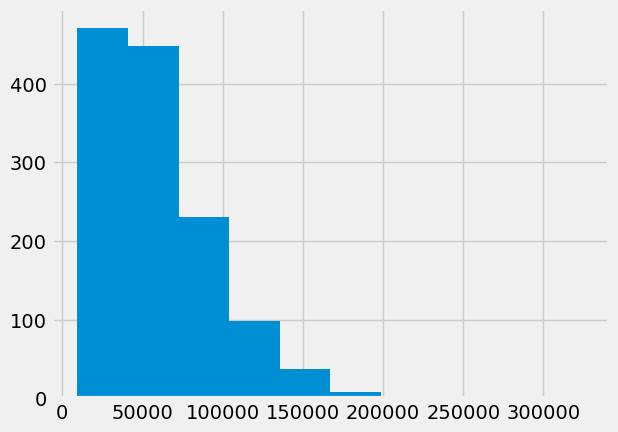

In [60]:
plt.hist(numeric.Price)

<Axes: xlabel='Price', ylabel='Density'>

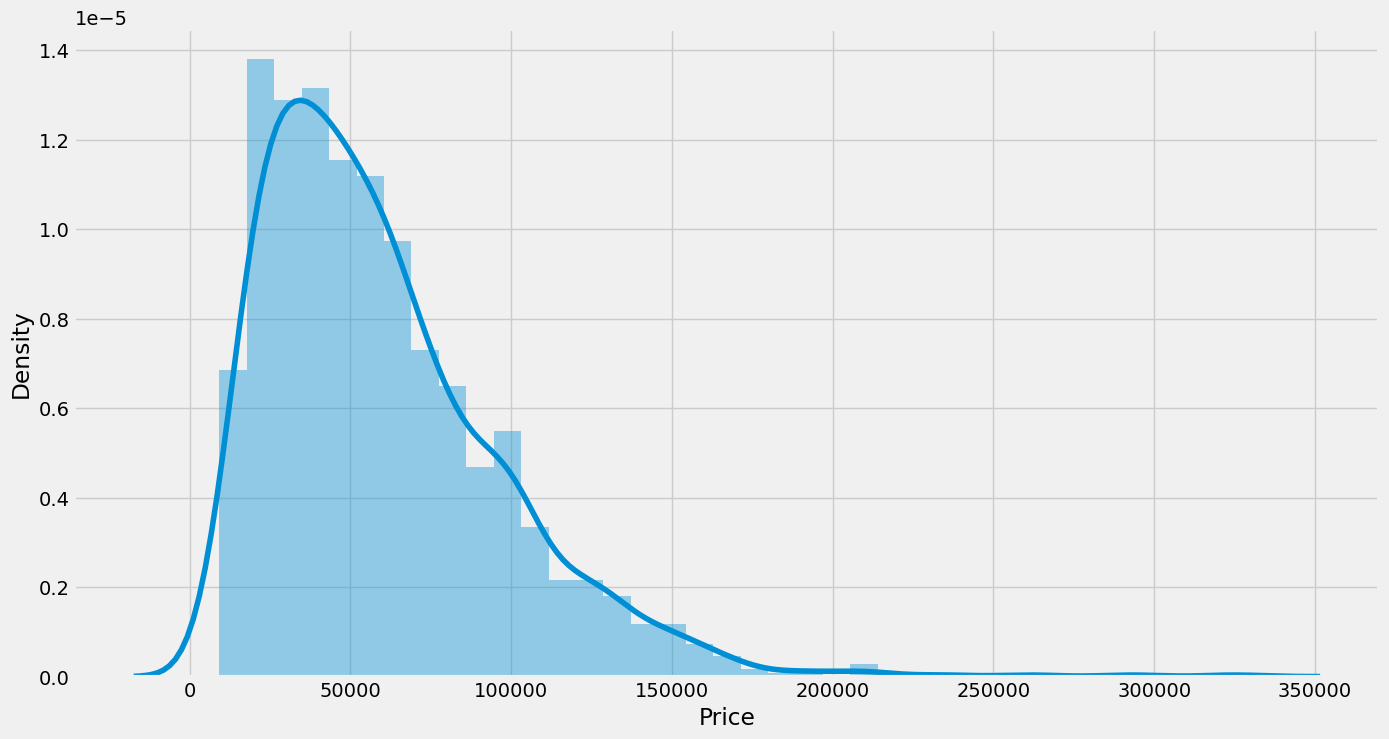

In [61]:
plt.figure(figsize=(15,8))
sns.distplot(numeric.Price)

our univariate analysis is completed ,so combine categorical and numerical

In [62]:
df_eda = pd.concat([categorical,numeric],axis = 1)
df_eda

,Company,TypeName,OpSys,CpuCompany,GPU,Ram,Weight,Touchscreen,ClockSpeed,HDD,SSD,Ppi,Price
0,Apple,Ultrabook,Mac,Intel,Intel,8,1.37,0,2.3,0.0,0.128,312.781955,71378.6832
1,Apple,Ultrabook,Mac,Intel,Intel,8,1.34,0,1.8,0.0,0.000,175.939850,47895.5232
2,HP,Notebook,No,Intel,Intel,8,1.86,0,2.5,0.0,0.256,192.307692,30636.0000
3,Apple,Ultrabook,Mac,Intel,AMD,16,1.83,0,2.7,0.0,0.512,303.896104,135195.3360
4,Apple,Ultrabook,Mac,Intel,Intel,8,1.37,0,3.1,0.0,0.256,312.781955,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,Windows,Intel,Intel,4,1.80,1,2.5,0.0,0.128,214.285714,33992.6400
1299,Lenovo,2 in 1 Convertible,Windows,Intel,Intel,16,1.30,1,2.5,0.0,0.512,375.939850,79866.7200
1300,Lenovo,Notebook,Windows,Intel,Intel,2,1.50,0,1.6,0.0,0.000,152.428571,12201.1200
1301,HP,Notebook,Windows,Intel,AMD,6,2.19,0,2.5,1.0,0.000,136.794872,40705.9200


**distribution of numerical variable**

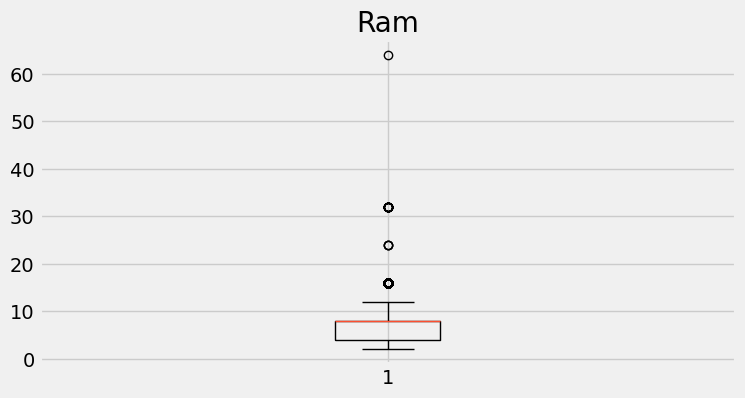

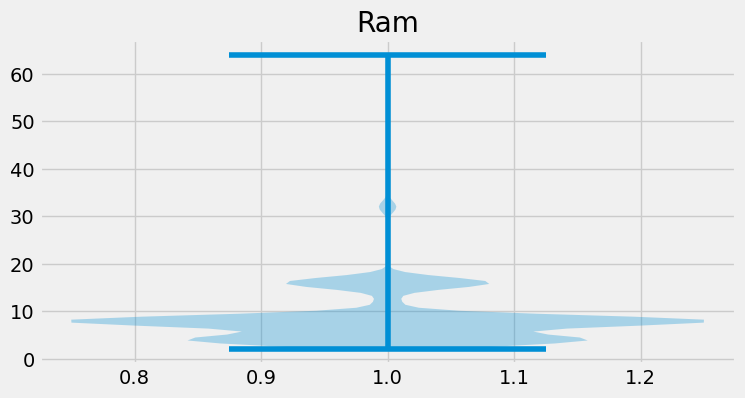

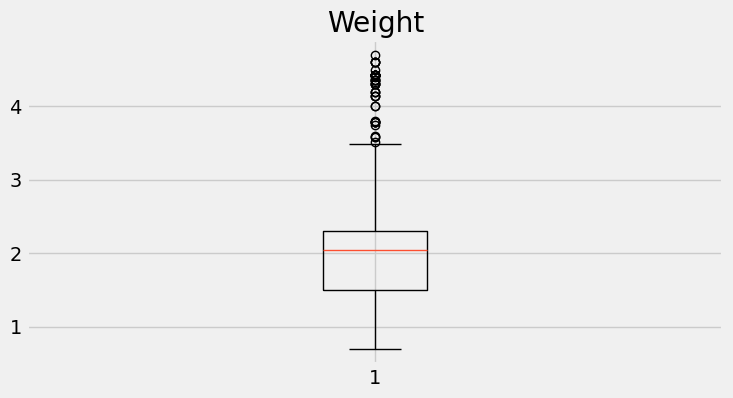

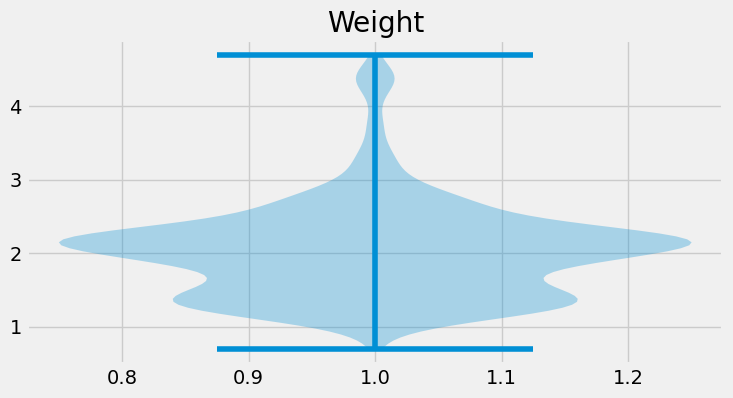

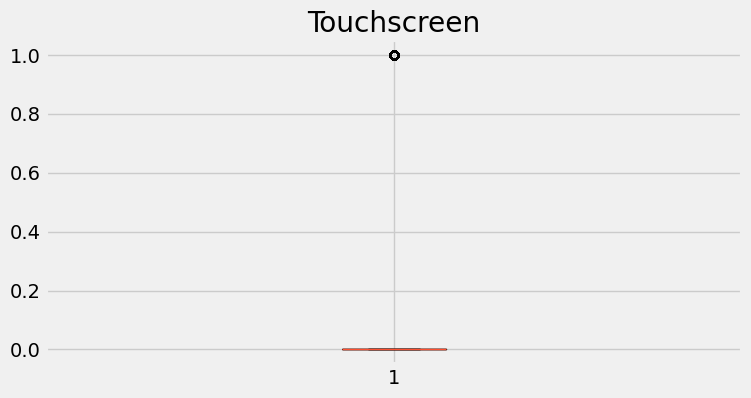

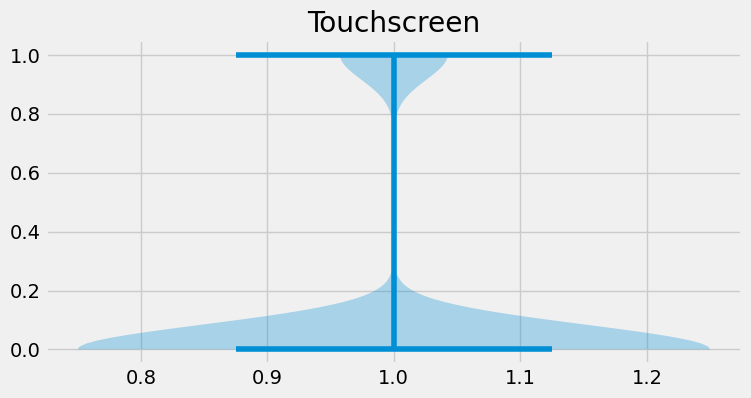

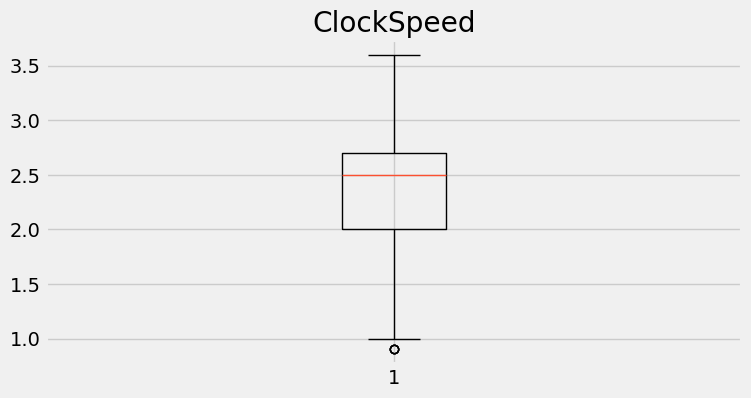

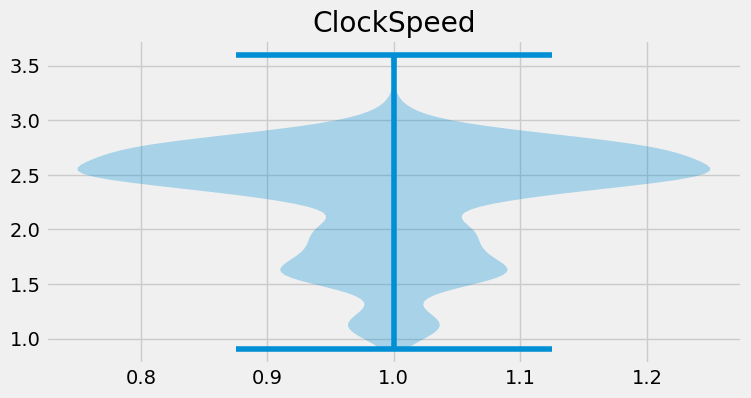

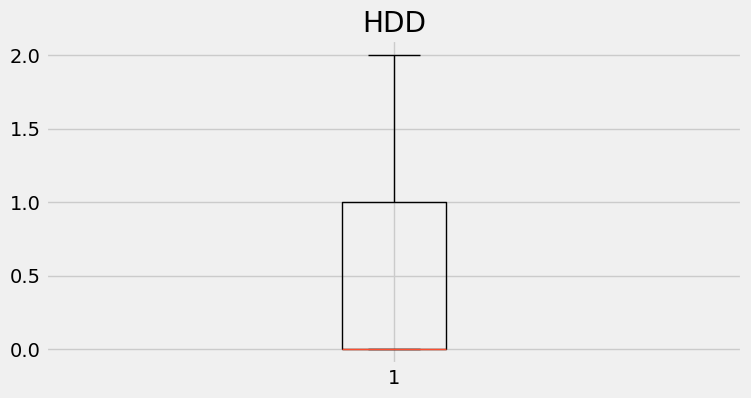

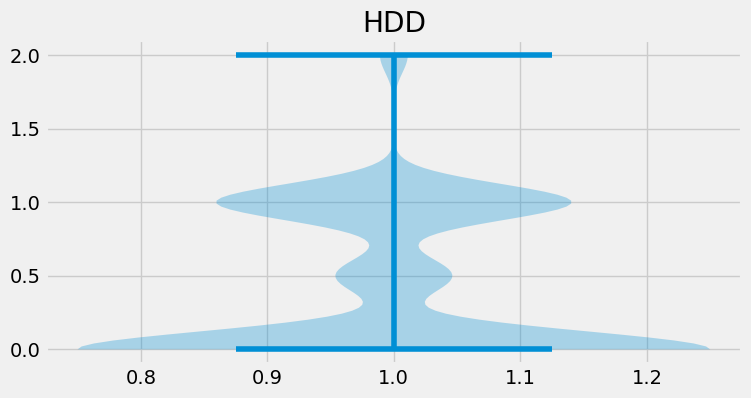

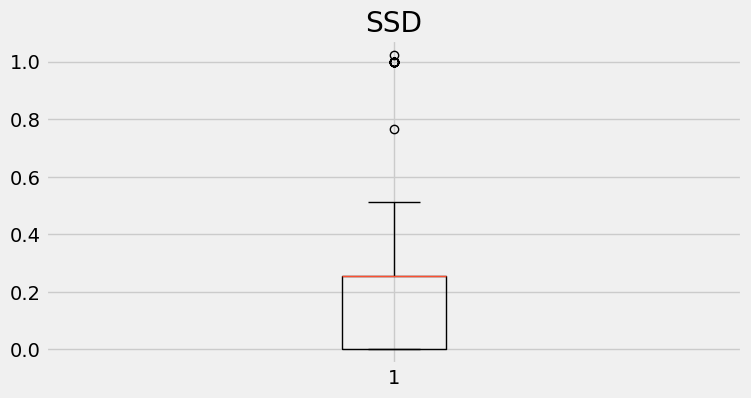

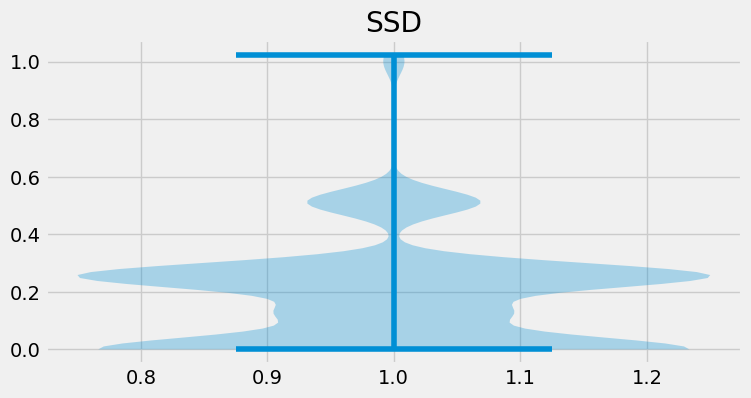

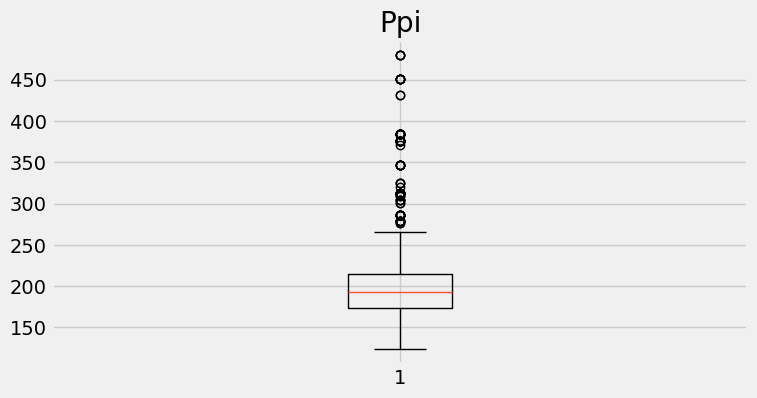

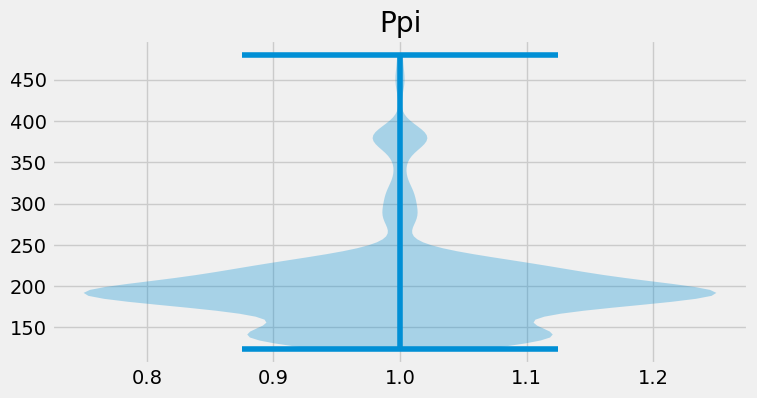

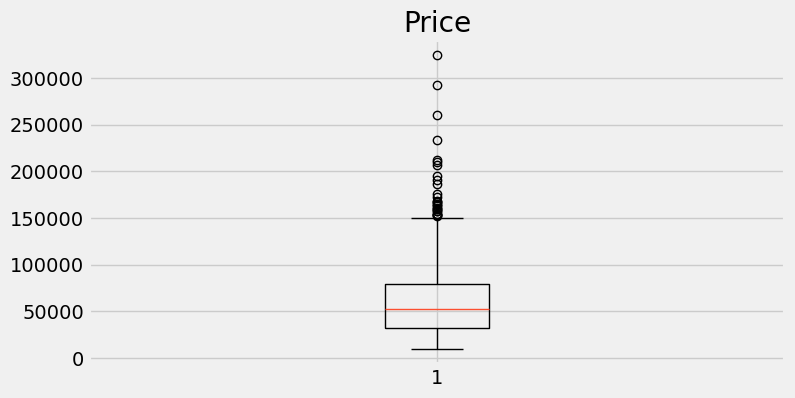

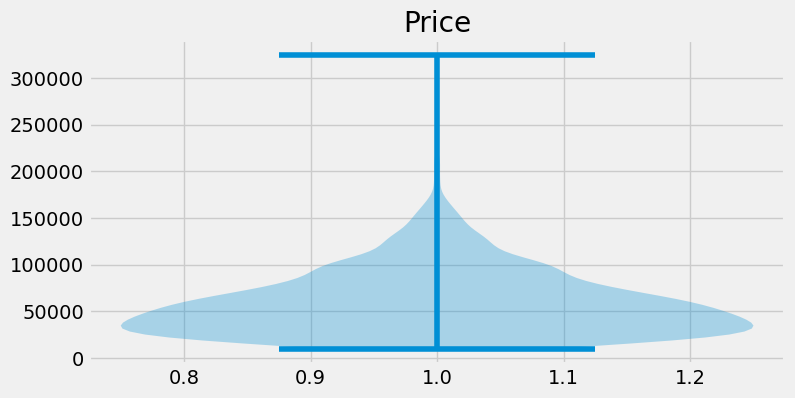

In [63]:
for i in numeric.columns:
    plt.figure(figsize=(8,4))
    plt.boxplot(numeric[i])
    plt.title(i)
    plt.show()
    plt.figure(figsize=(8,4))
    plt.title(i)
    plt.violinplot(numeric[i])
    plt.show()


from above plot we can easily identifies 

**Ram** : majority of the laptops has 8gb of ram

**Weight** : most of them have weight in between 1.5 - 2.5 kg

**clockspeed** : most frequent is in between 2.5 - 2.8 GHz

**touchscreen** : non touch laptop is  morethan touchscreen 

**HDD** : most of them  have either 0tb or 1tb  

**SSD** : most of them  have 256gb 

**Ppi** : 180ppi - 200ppi is the frequent

**price** : most of laptop has price around 50000 

## 2. Bivariate analysis <a class="anchor"  id="bi"></a>

Bivariate analysis is a statistical method used to analyze the relationship between two variables. Unlike univariate analysis, which focuses on understanding individual variables in isolation, bivariate analysis explores how two variables interact and influence each other. This type of analysis helps researchers and analysts uncover patterns, correlations, dependencies, and trends between two variables.

### 2.1 **categorical - categorical** <a class="anchor"  id="bicatcat"></a>

In [64]:
df_eda.columns = ['Company', 'Type', 'OpSys', 'CPU', 'GPU', 'Ram', 'Weight',
       'Touchscreen', 'ClockSpeed', 'HDD', 'SSD', 'PPI', 'Price']

#### **non graphical**

**Contingency table**

In [65]:
company_type = pd.crosstab(df_eda.Company,df_eda.Type)
company_type

Type,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation
Company,,,,,,
Acer,8,8,5,78,4,0
Apple,0,0,0,0,21,0
Asus,13,54,4,67,20,0
Dell,30,40,2,165,49,11
HP,19,12,9,184,36,14
Lenovo,46,32,4,178,31,4
MSI,0,54,0,0,0,0
Samsung,1,0,1,1,5,0
Toshiba,0,0,0,36,12,0


Contingency table is good to get numerical relationship between categorical features but very risky if number of columns is increases , so we move to graphical methods

#### **Graphical**

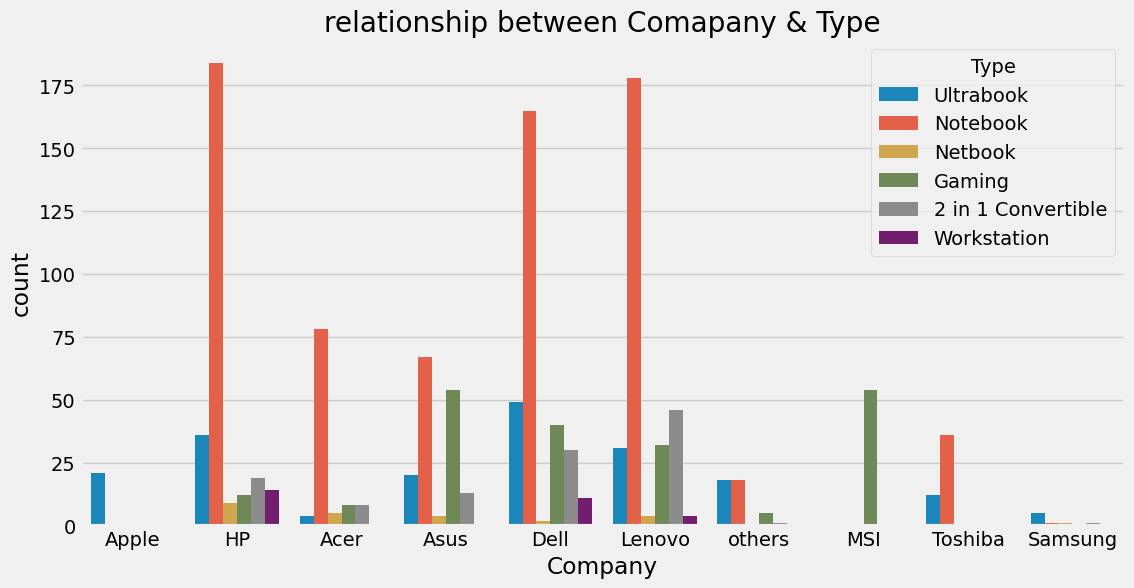

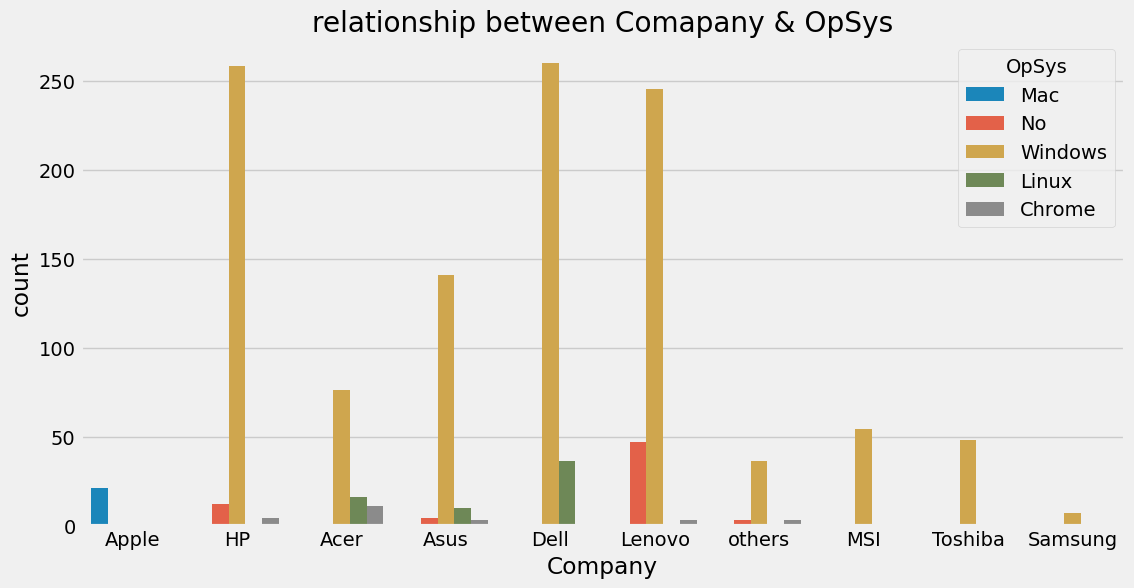

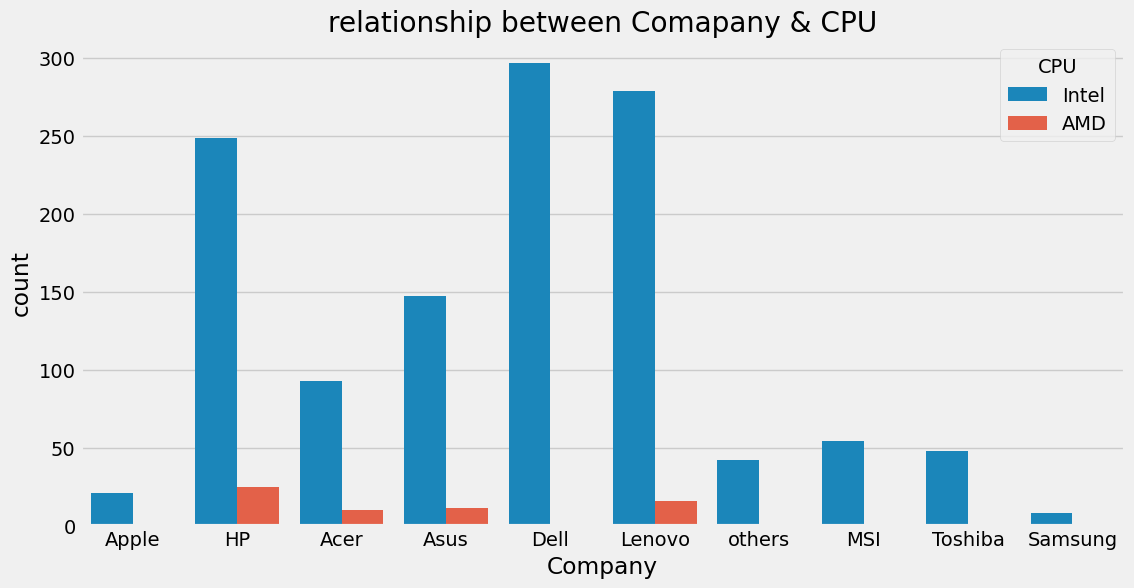

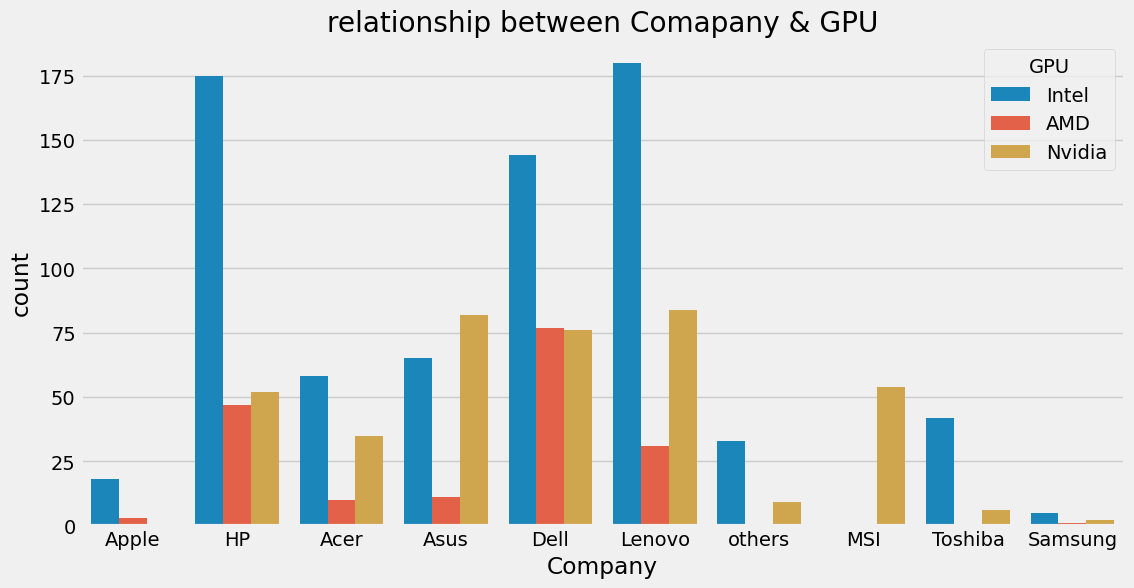

In [66]:
for i in df_eda.select_dtypes(include=[np.object_]).columns:
    if i == 'Company':
        pass
    else:
        plt.figure(figsize=(12,6))
        sns.countplot(x='Company',hue=i,data=df_eda)
        plt.title(f'relationship between Comapany & {i}')
        plt.show()

**Type**

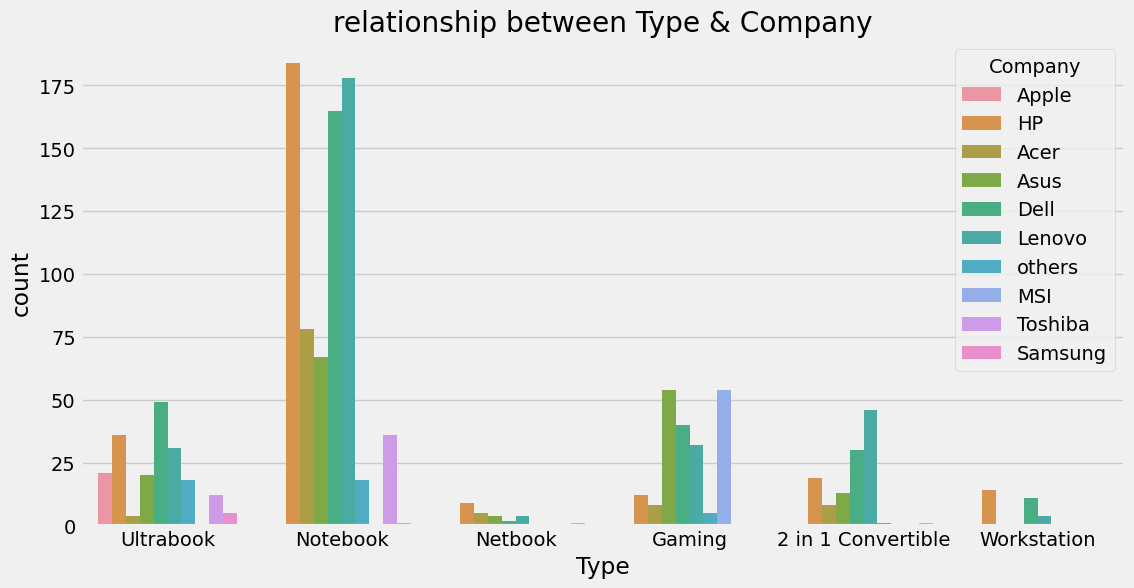

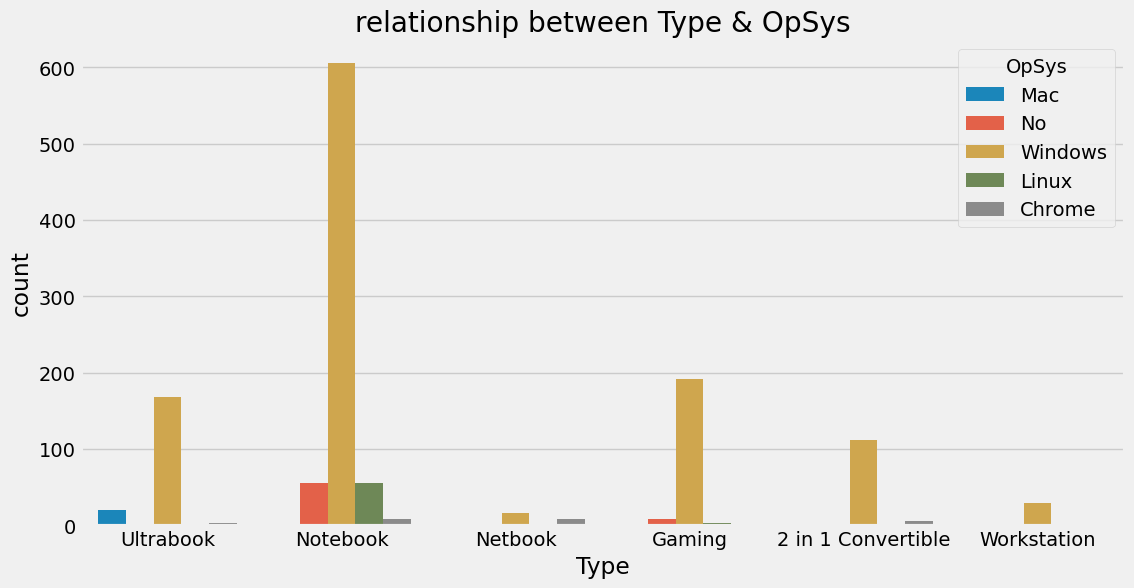

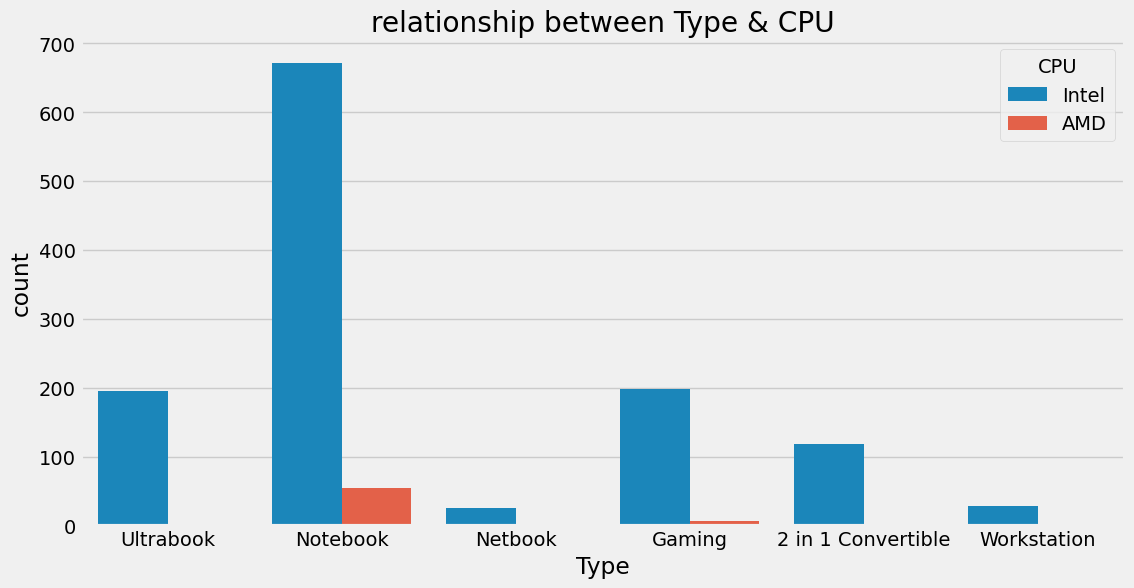

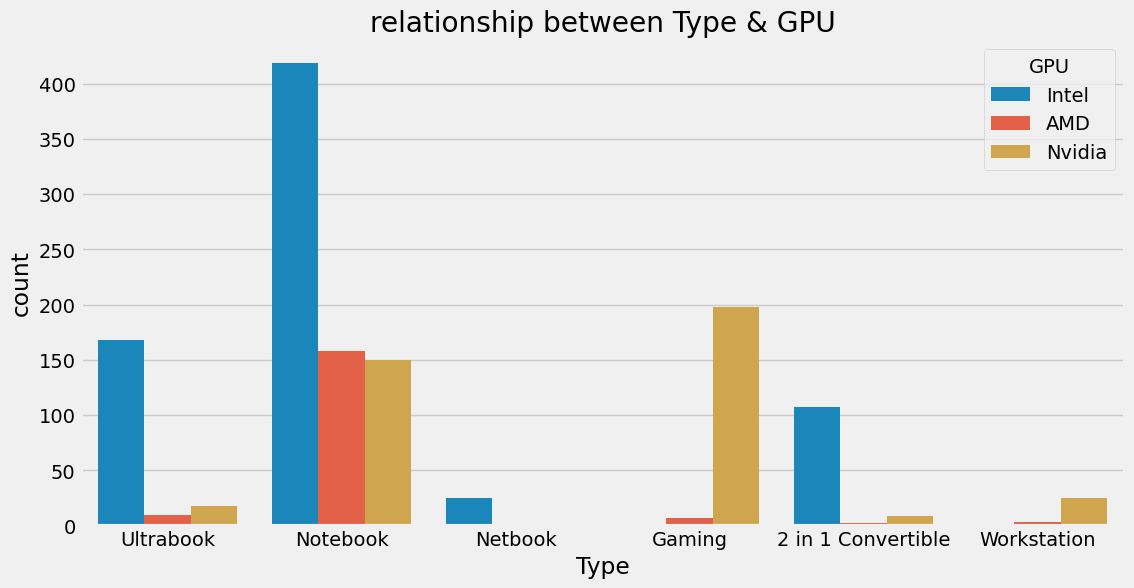

In [67]:
for i in df_eda.select_dtypes(include=[np.object_]).columns:
    if i == 'Type':
        pass
    else:
        plt.figure(figsize=(12,6))
        sns.countplot(x='Type',hue=i,data=df_eda)
        plt.title(f'relationship between Type & {i}')
        plt.show()

**Opsys**

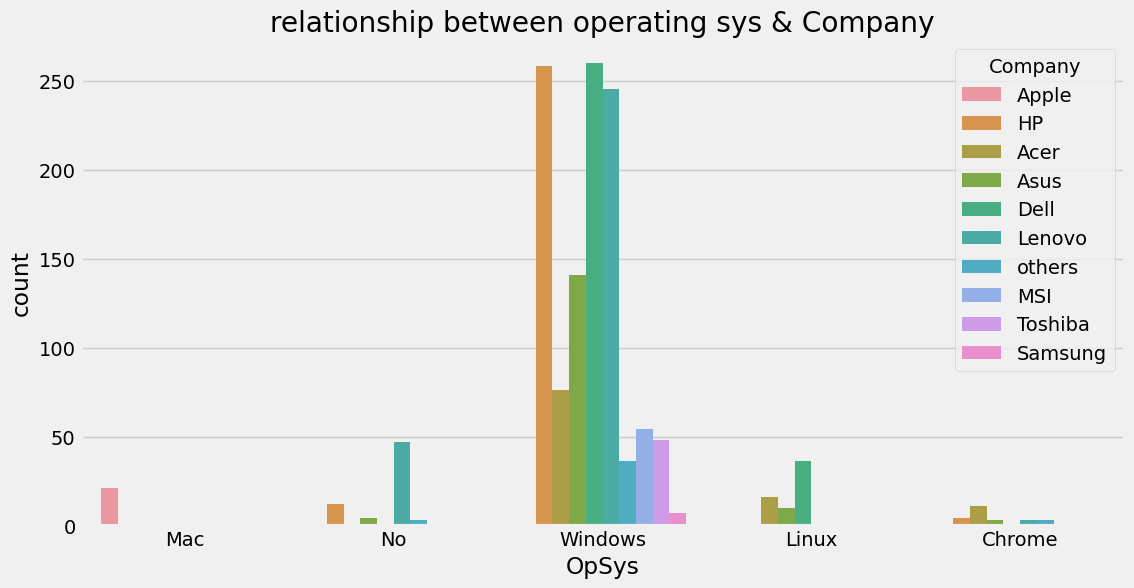

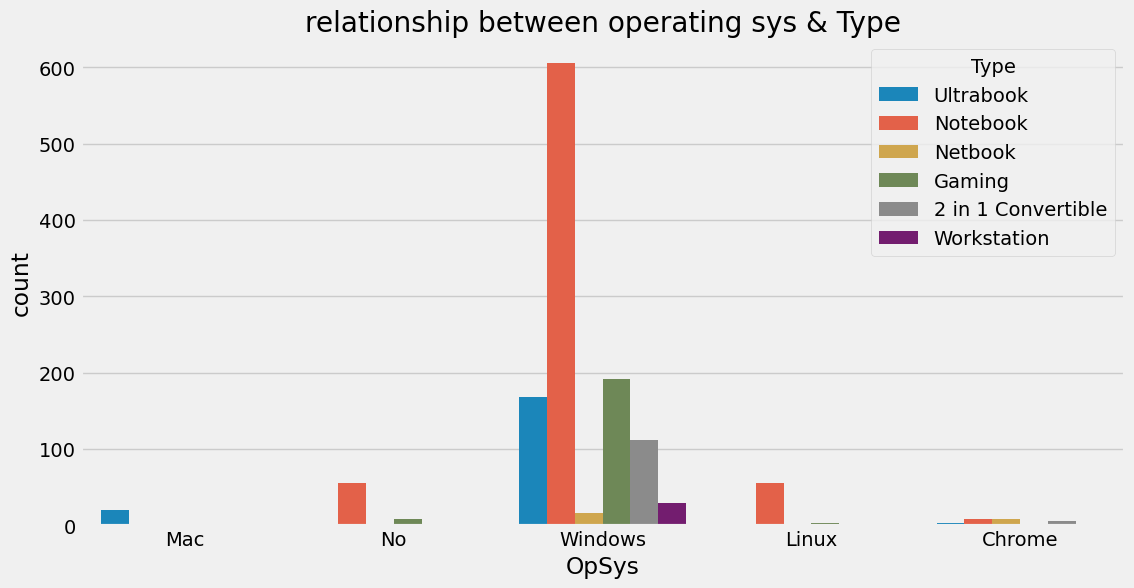

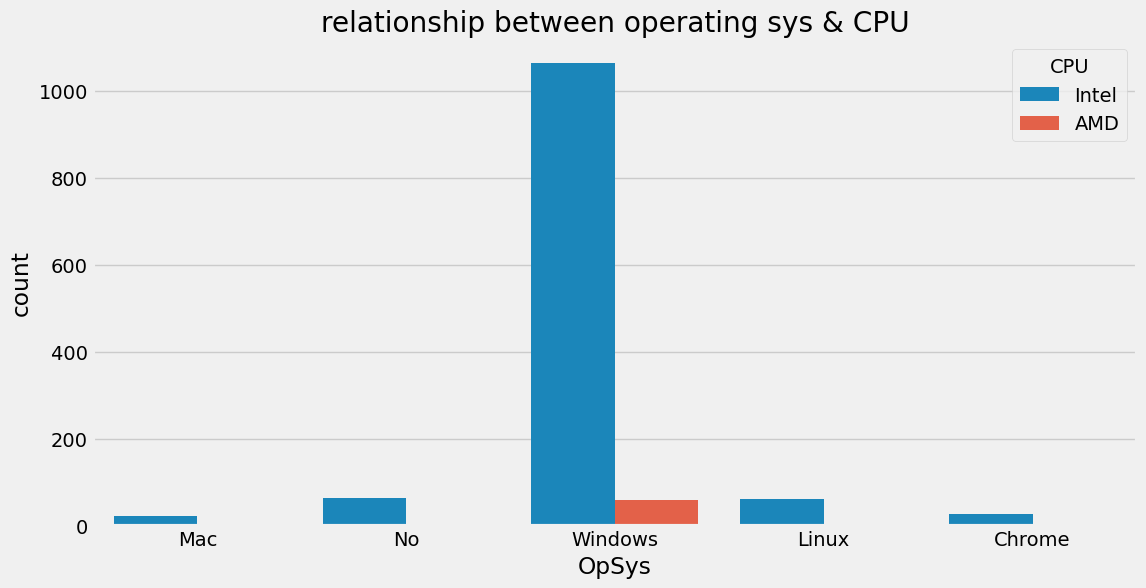

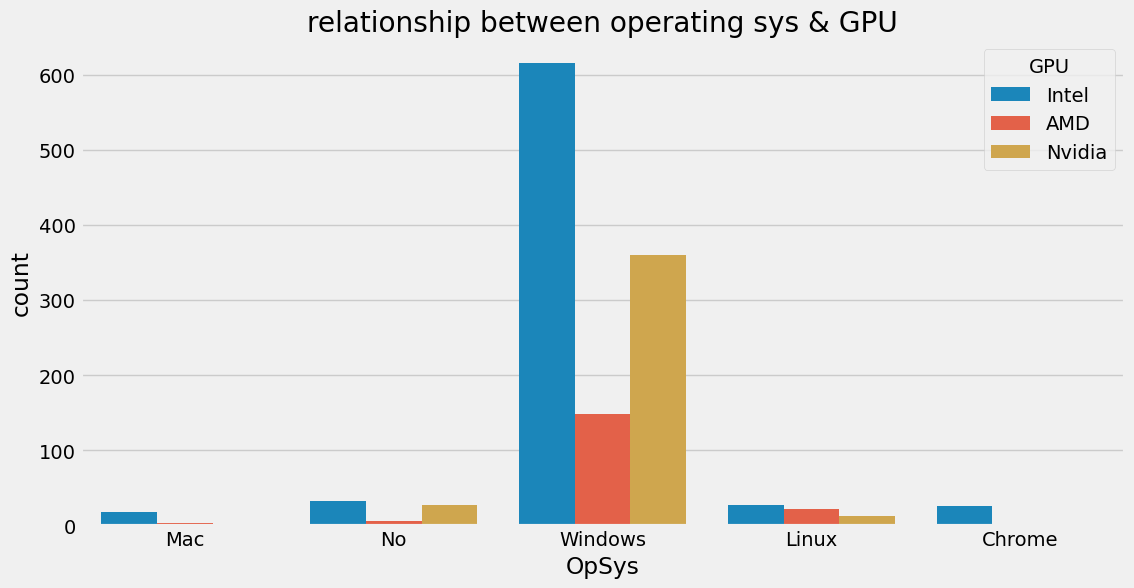

In [68]:
for i in df_eda.select_dtypes(include=[np.object_]).columns:
    if i == 'OpSys':
        pass
    else:
        plt.figure(figsize=(12,6))
        sns.countplot(x='OpSys',hue=i,data=df_eda)
        plt.title(f'relationship between operating sys & {i}')
        plt.show()

**CPU**

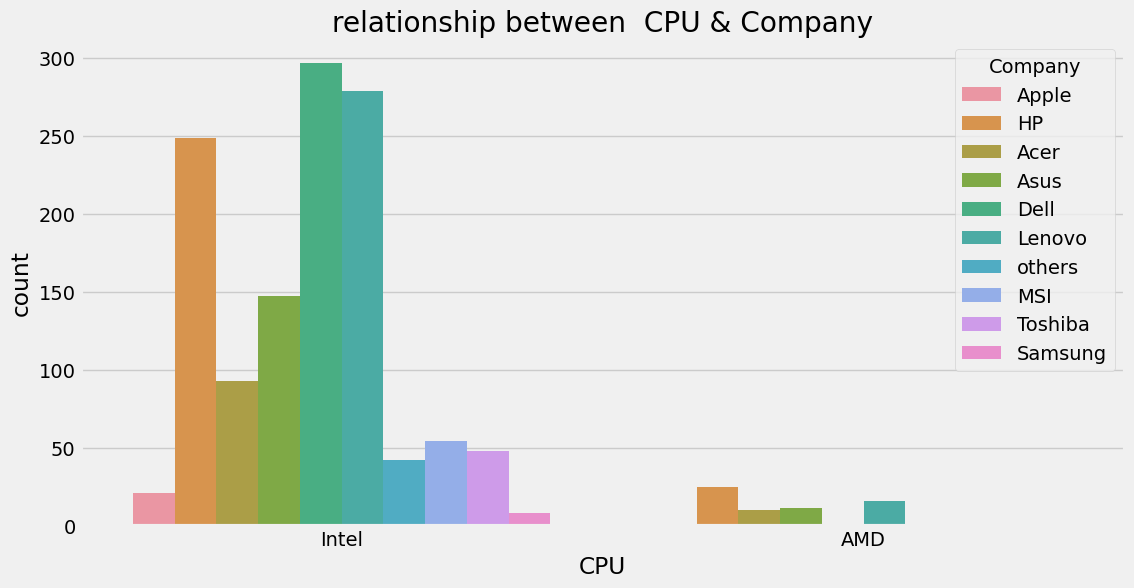

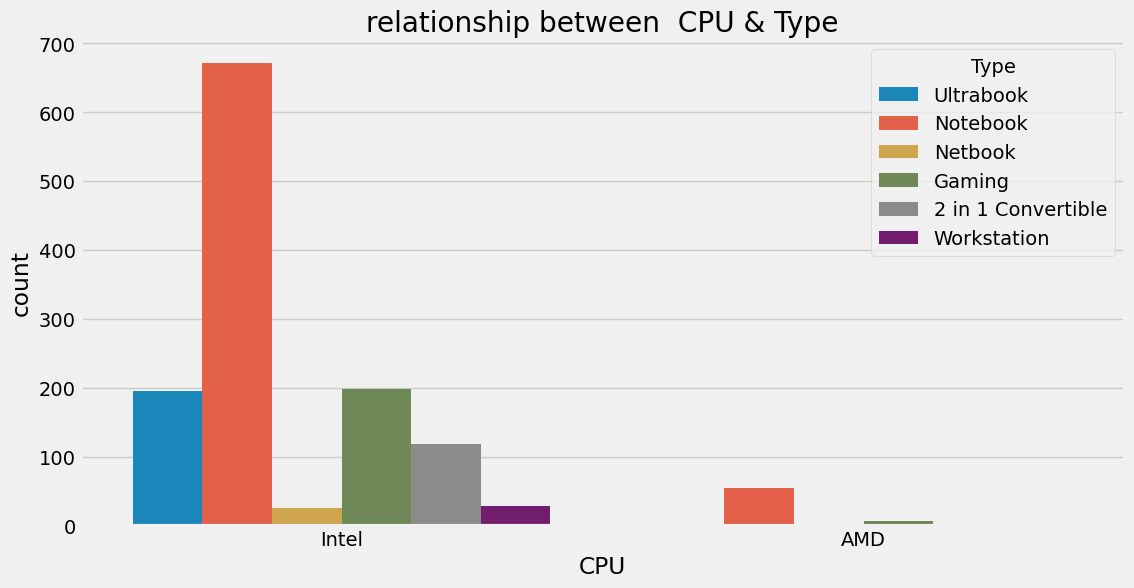

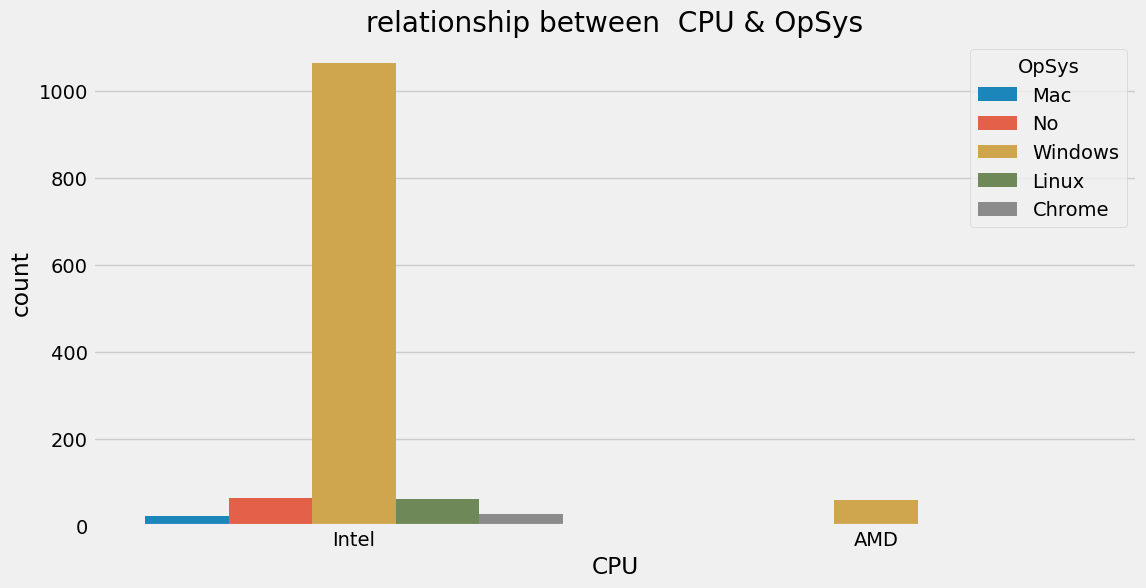

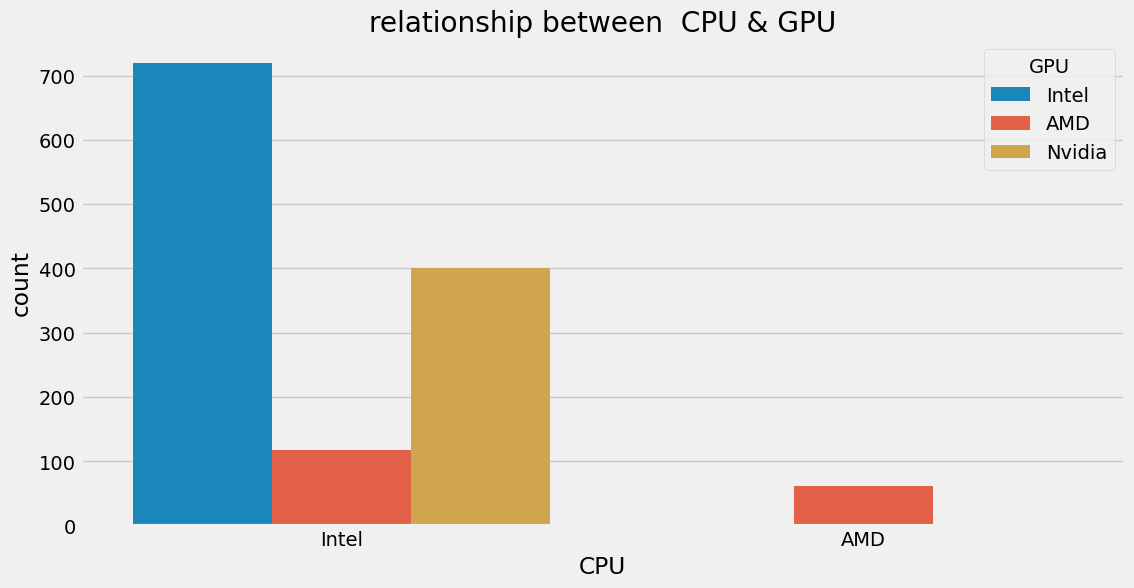

In [69]:
for i in df_eda.select_dtypes(include=[np.object_]).columns:
    if i == 'CPU':
        pass
    else:
        plt.figure(figsize=(12,6))
        sns.countplot(x='CPU',hue=i,data=df_eda)
        plt.title(f'relationship between  CPU & {i}')
        plt.show()

**GPU**

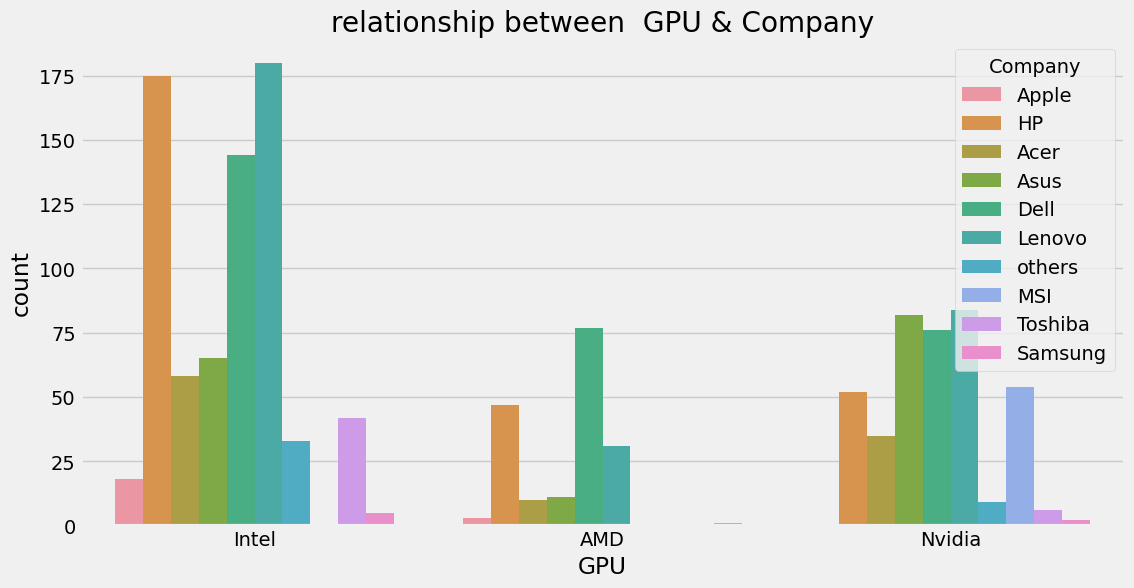

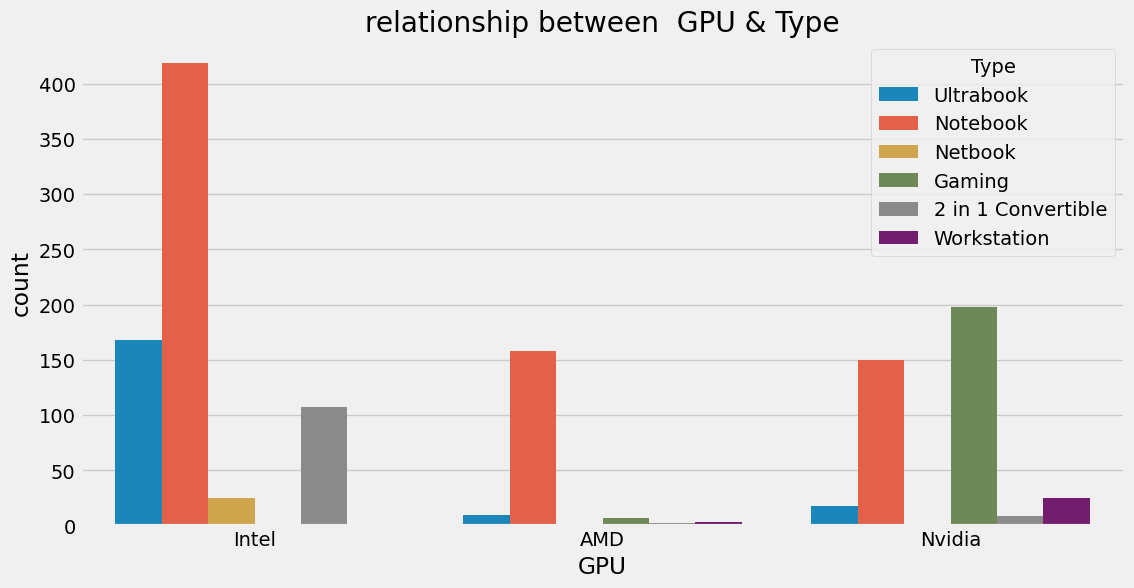

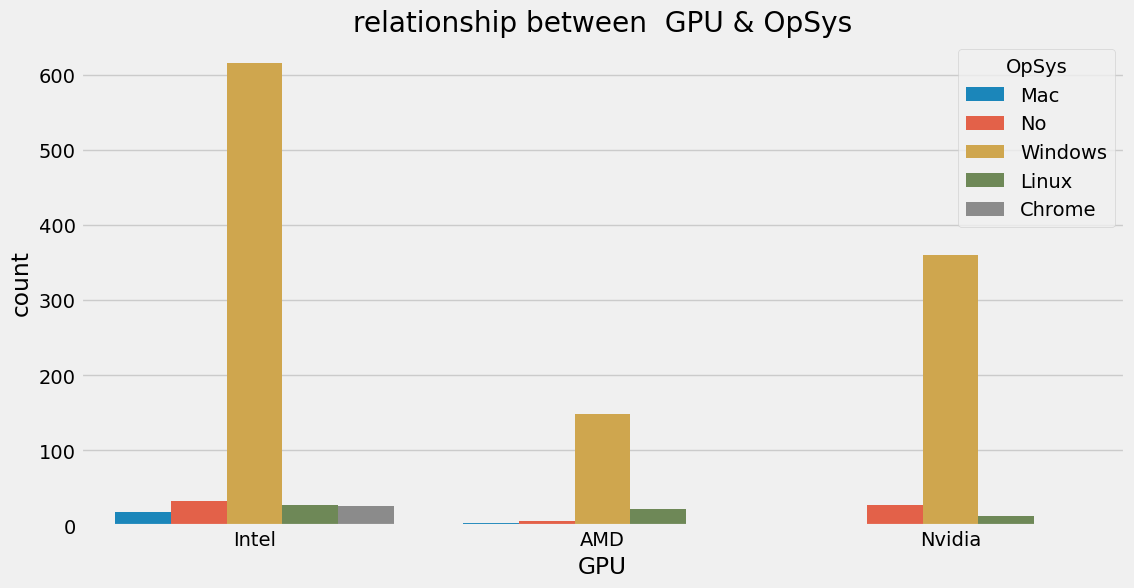

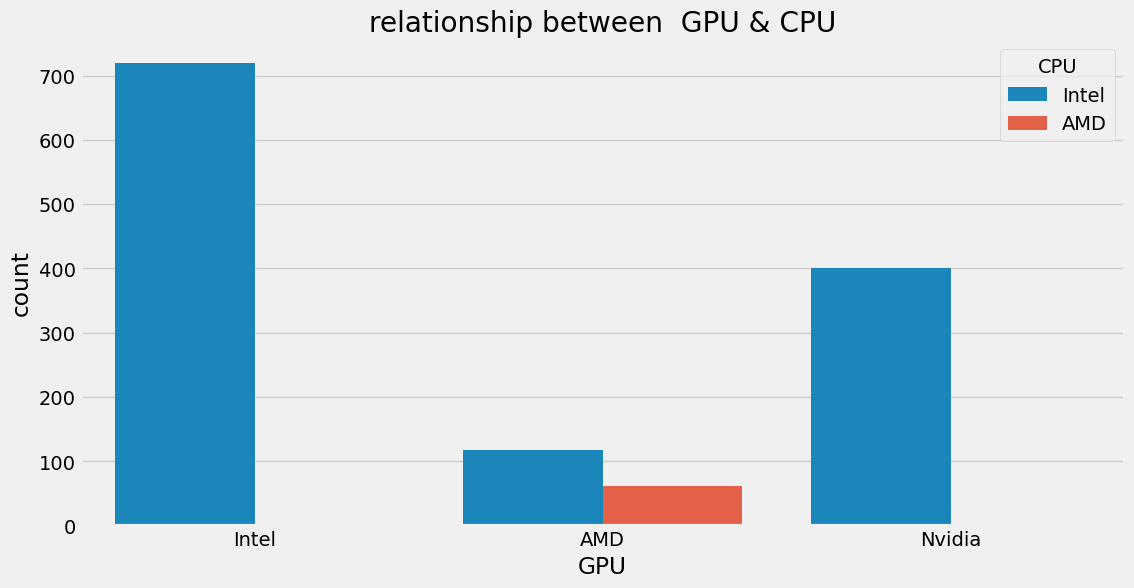

In [70]:
for i in df_eda.select_dtypes(include=[np.object_]).columns:
    if i == 'GPU':
        pass
    else:
        plt.figure(figsize=(12,6))
        sns.countplot(x='GPU',hue=i,data=df_eda)
        plt.title(f'relationship between  GPU & {i}')
        plt.show()

you can easly identifies how categorical variable are realted to each other 
example

in the case of apple :
* only use inte cpu
* not use nvidia gpu
* type - ultrabook only
* operating system mac only

similarly each of the company products has some relationships that can easly identifies using this kind of graph


### 2.2 **numerical - numerical** <a class="anchor"  id="binumnum"></a>

In [71]:
numeric.columns

Index(['Ram', 'Weight', 'Touchscreen', 'ClockSpeed', 'HDD', 'SSD', 'Ppi',
       'Price'],
      dtype='object')

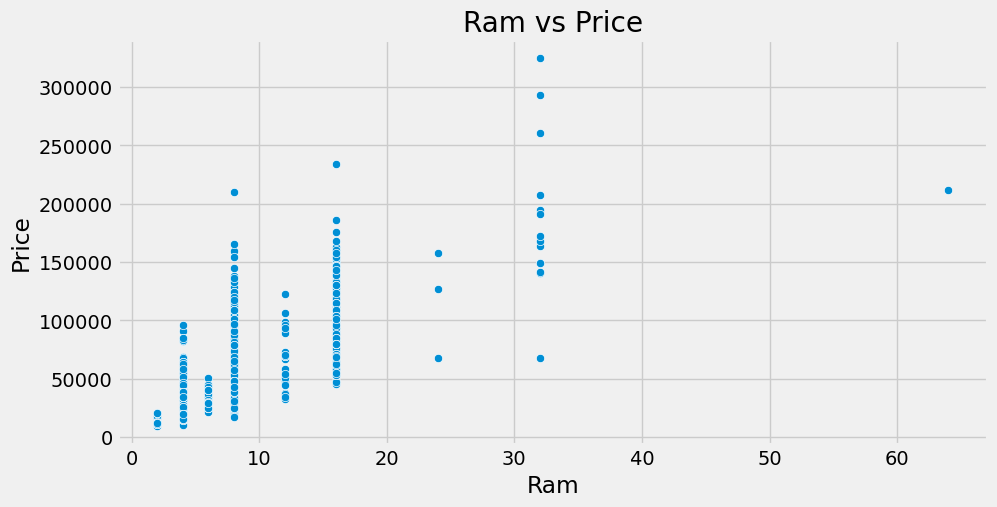

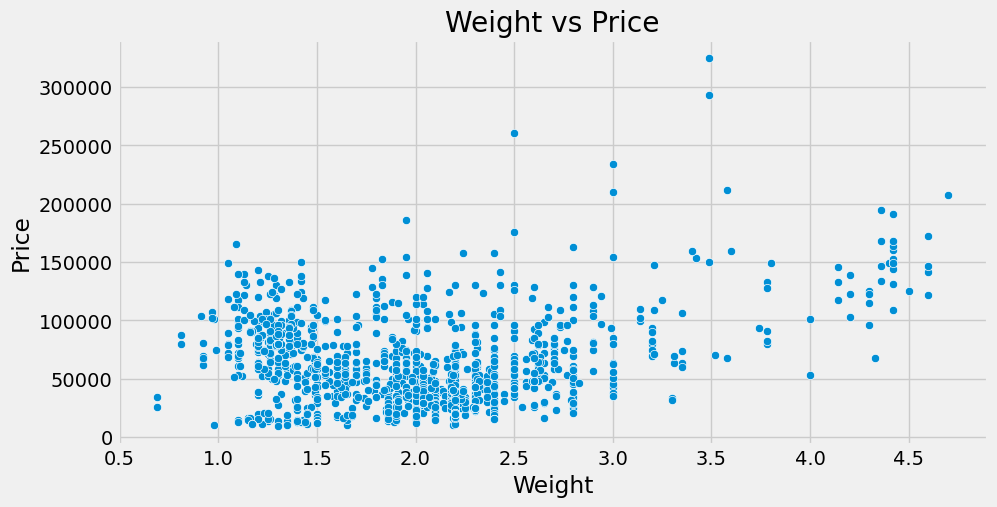

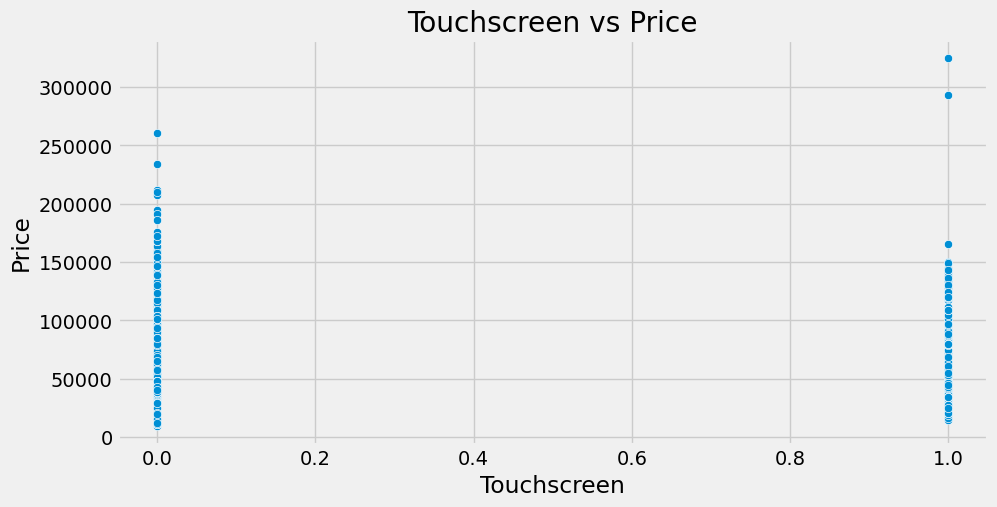

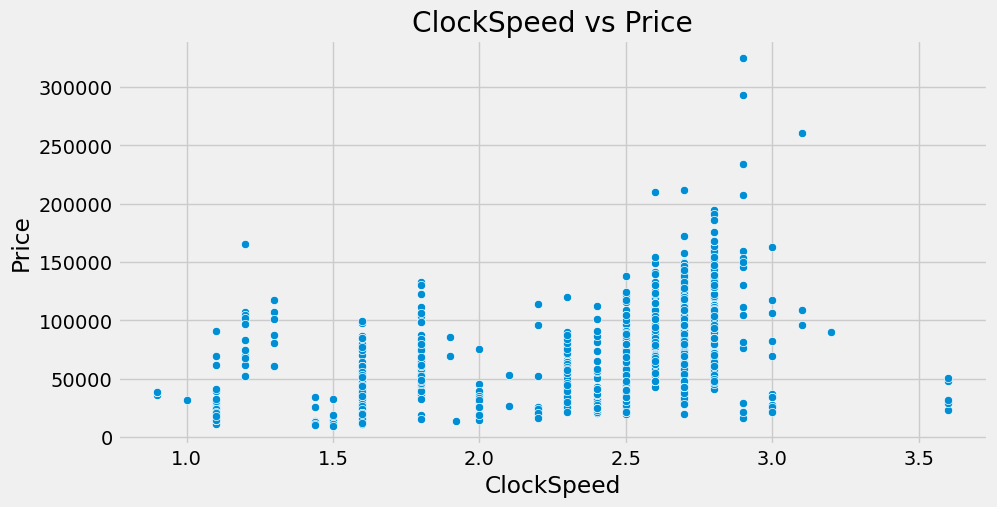

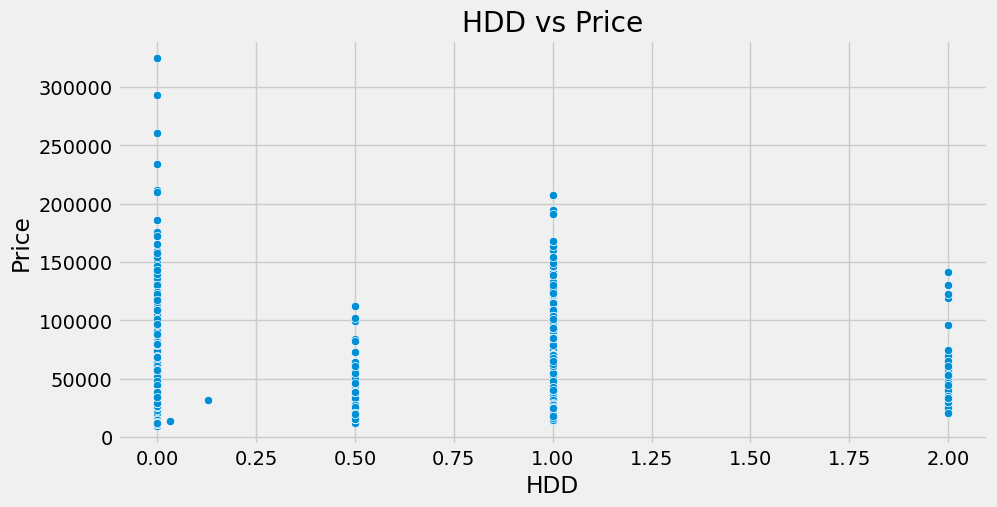

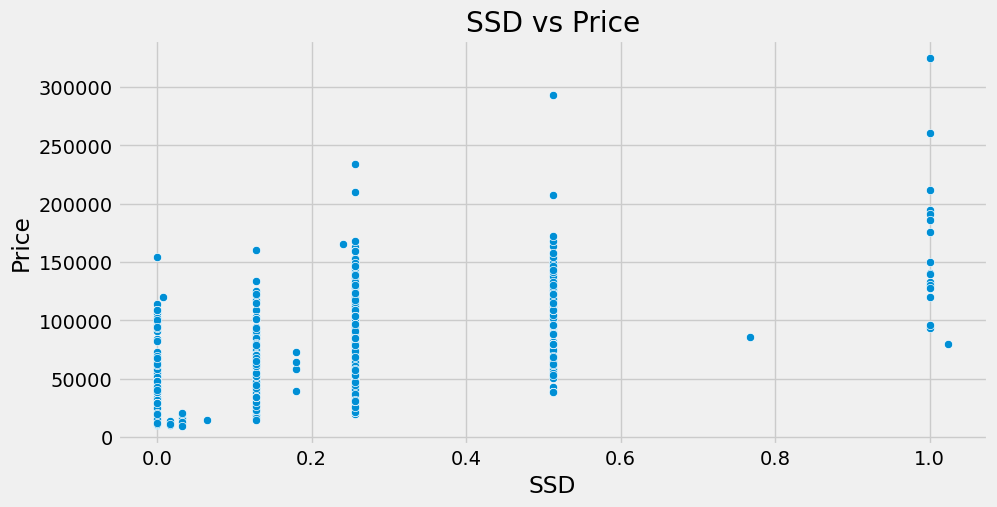

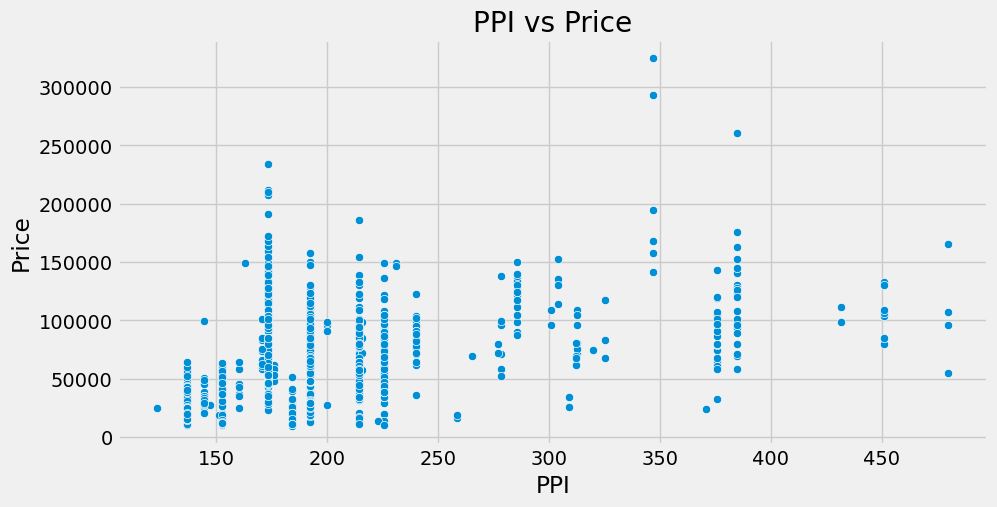

In [72]:
for i in df_eda.select_dtypes([np.int64,np.float64]).columns:
    
    if i != 'Price':
        plt.figure(figsize=(10,5))
        sns.scatterplot(x=i,y='Price',data=df_eda)
        plt.title(f'{i} vs Price')
        plt.show()

some understandings:

* **Ram** is not contineous values & ram is icreases then minimum price is also inceases

* **weight** and price and prices are not much relations

* **touchscreen** or non touchscreen, it not much influences in price and it is not contineous

* **HDD** is makes some negative effect on prices , like laptop has no HDD has more price than laptop with HDD

* the amount of **SSD** increses then the base price of laptop of is also increases

* after some amount of **ppi** ,price is going to high with a high rate


### 2.3 **categorical - numerical** <a class="anchor"  id="bicatnum"></a>

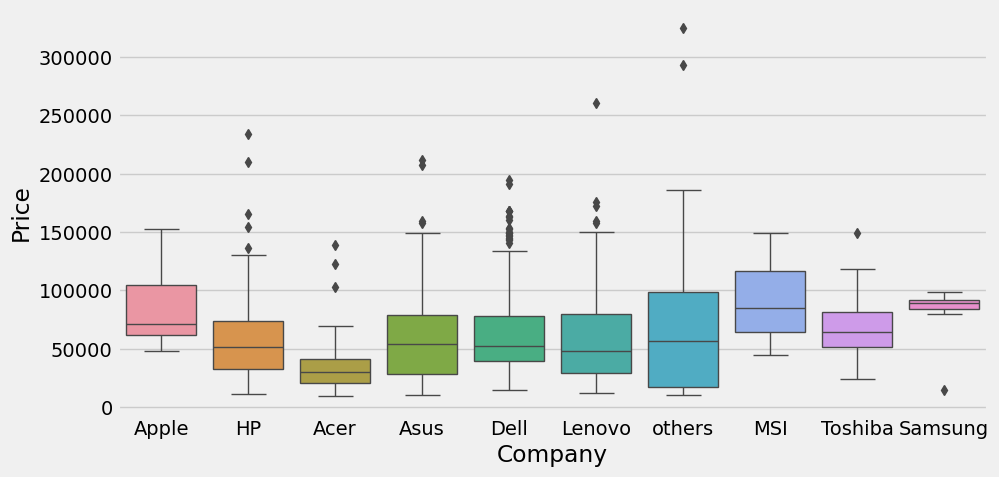

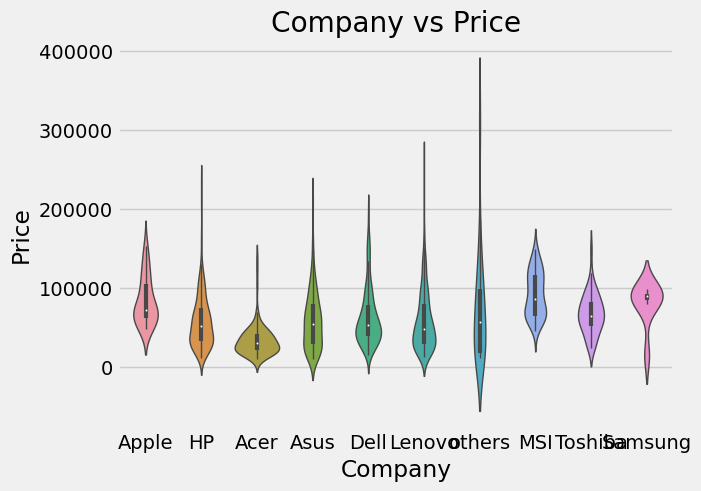

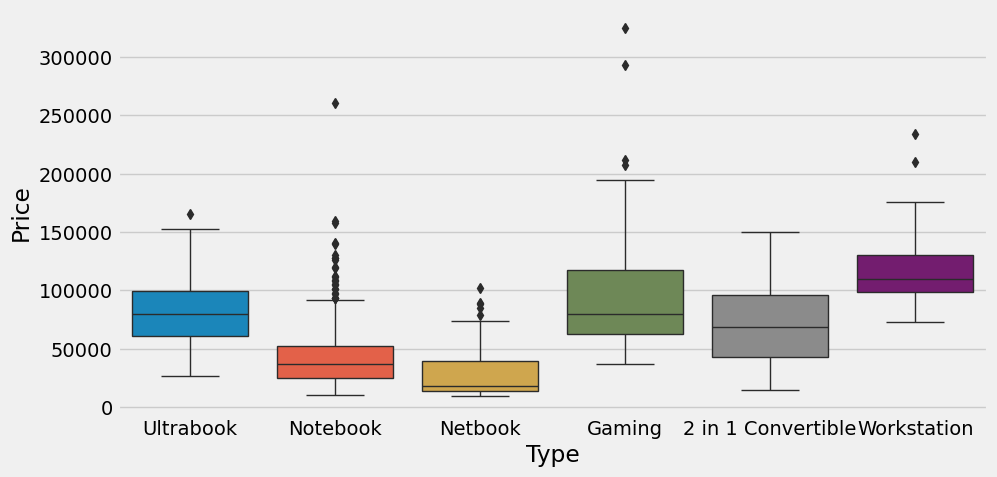

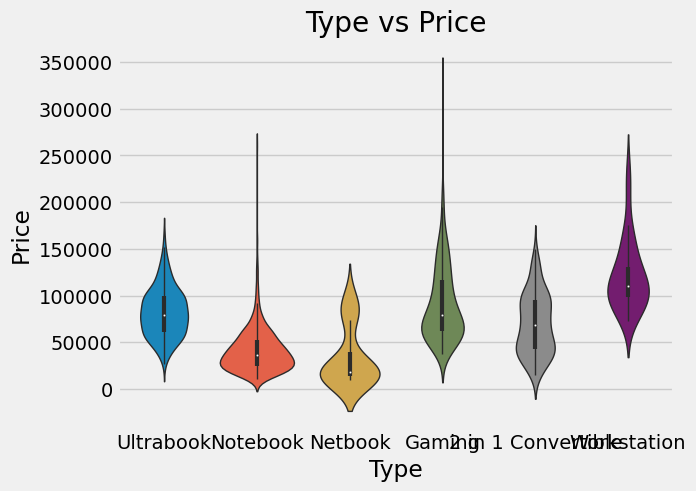

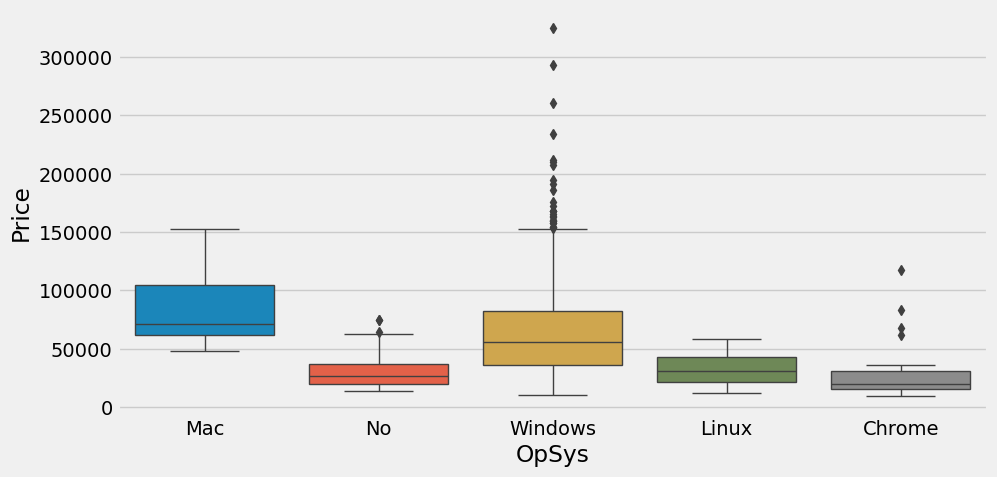

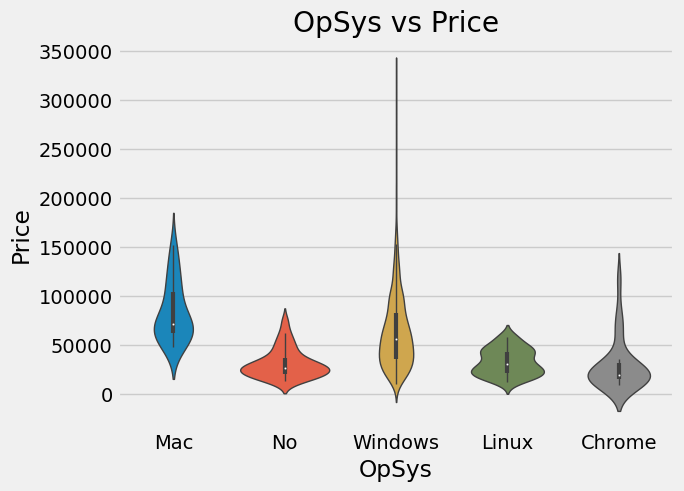

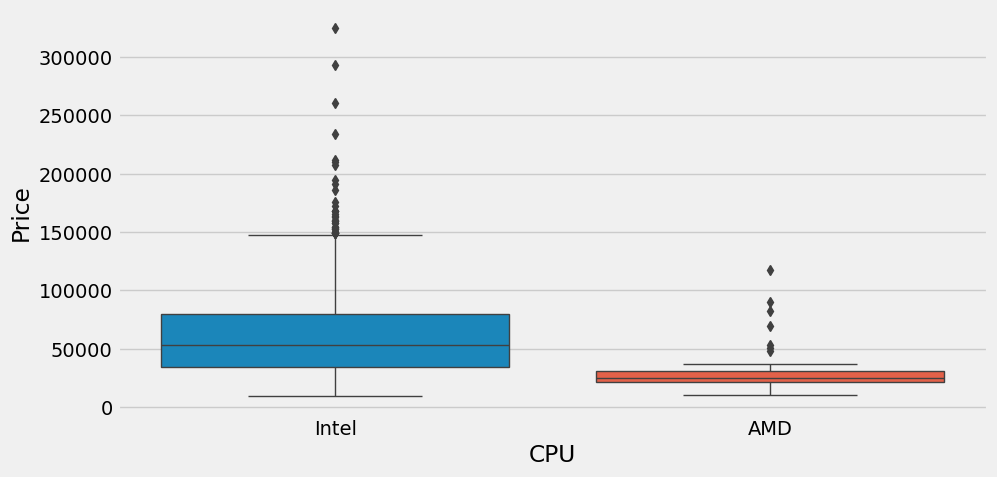

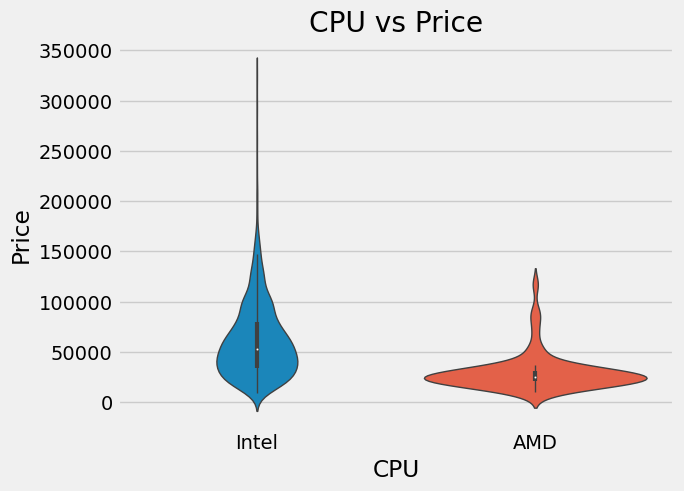

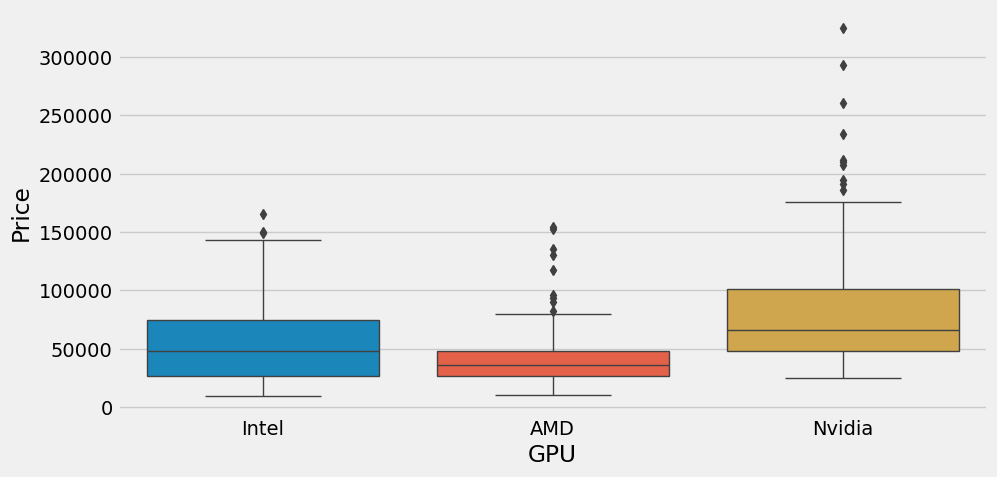

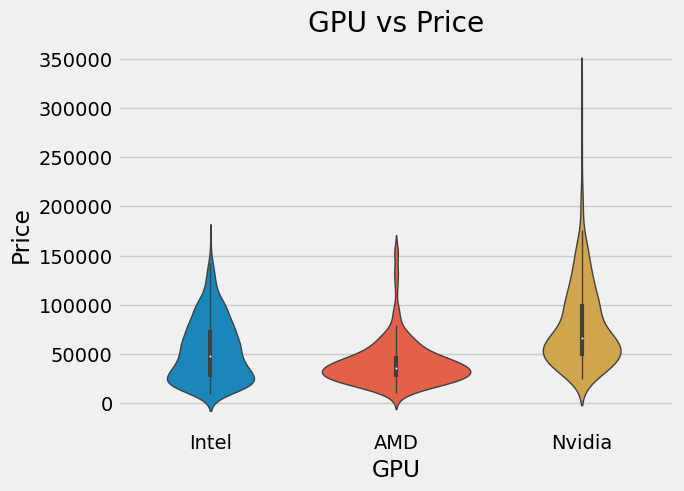

In [73]:
for i in df_eda.select_dtypes(include=[np.object_]).columns:
    
    plt.figure(figsize=(10,5))
    sns.boxplot(x=i,y='Price',data=df_eda,linewidth=1)
    plt.show()
    sns.violinplot(x=i,y='Price',data=df_eda,linewidth=1)    
    plt.title(f'{i} vs Price')
    plt.show()

from above graph you can see , how categorical variabls are related to the dependent variable price

like,

* how price is distributed w.r.t operating system or cpu or ...
* how much outlier present w.r.t categorical features


## 3.**multivariate analysis** <a class="anchor"  id="mul"></a>

In [74]:
df_eda.corr()

,Ram,Weight,Touchscreen,ClockSpeed,HDD,SSD,PPI,Price
Ram,1.000000,0.382099,0.122697,0.366534,0.094843,0.602868,0.308264,0.742592
Weight,0.382099,1.000000,-0.287673,0.316497,0.513523,-0.067152,-0.319333,0.207603
Touchscreen,0.122697,-0.287673,1.000000,-0.075893,-0.206816,0.262600,0.454976,0.197618
ClockSpeed,0.366534,0.316497,-0.075893,1.000000,0.127400,0.253943,0.048252,0.428825
HDD,0.094843,0.513523,-0.206816,0.127400,1.000000,-0.402465,-0.293951,-0.098235
SSD,0.602868,-0.067152,0.262600,0.253943,-0.402465,1.000000,0.512687,0.670181
PPI,0.308264,-0.319333,0.454976,0.048252,-0.293951,0.512687,1.000000,0.479218
Price,0.742592,0.207603,0.197618,0.428825,-0.098235,0.670181,0.479218,1.000000


<Axes: >

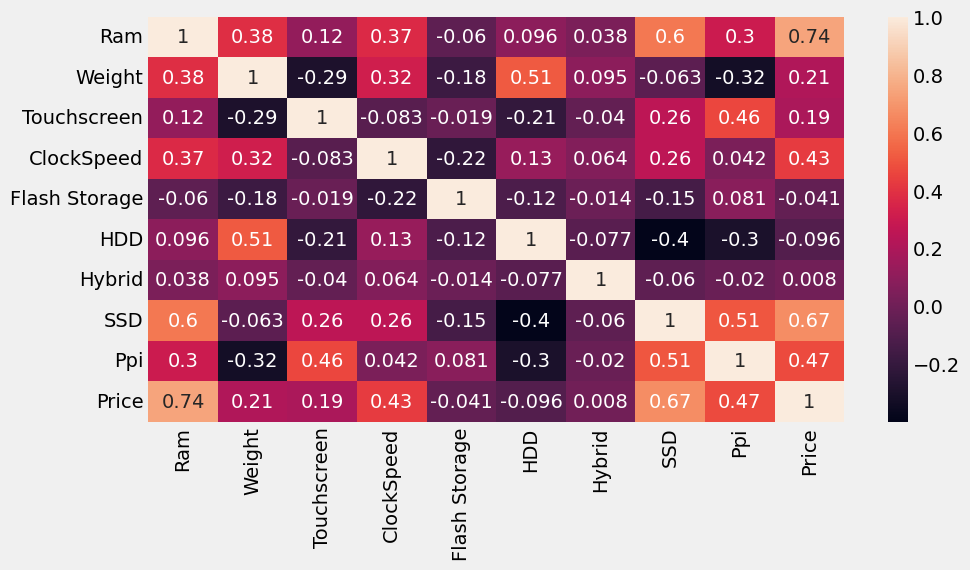

In [75]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

for more understanding we can use a threshould 0.8 , above them are highly correlated and drop them

<Axes: >

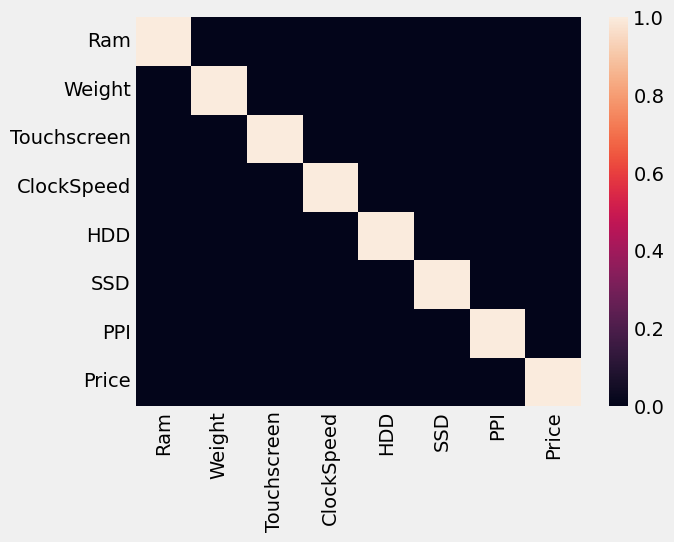

In [76]:
sns.heatmap(df_eda.corr()>0.8 )

there is no high correlation w.r.t thresh 0.8

<Axes: >

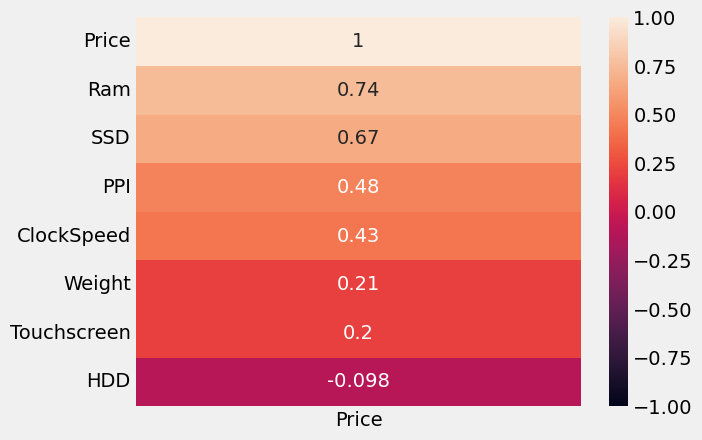

In [77]:
sns.heatmap(df_eda.corr()[['Price']].sort_values(by='Price', ascending=False), vmin=-1, vmax=1, annot=True,)

above graph is shows how numerical features are correlated to dependent variable 
from graph,

* **Ram** has high +ve  correlation to price
* **Touchscreen** and **Weight** are shows small +ve correlation 
* **HDD** is shows vary small negative correlation


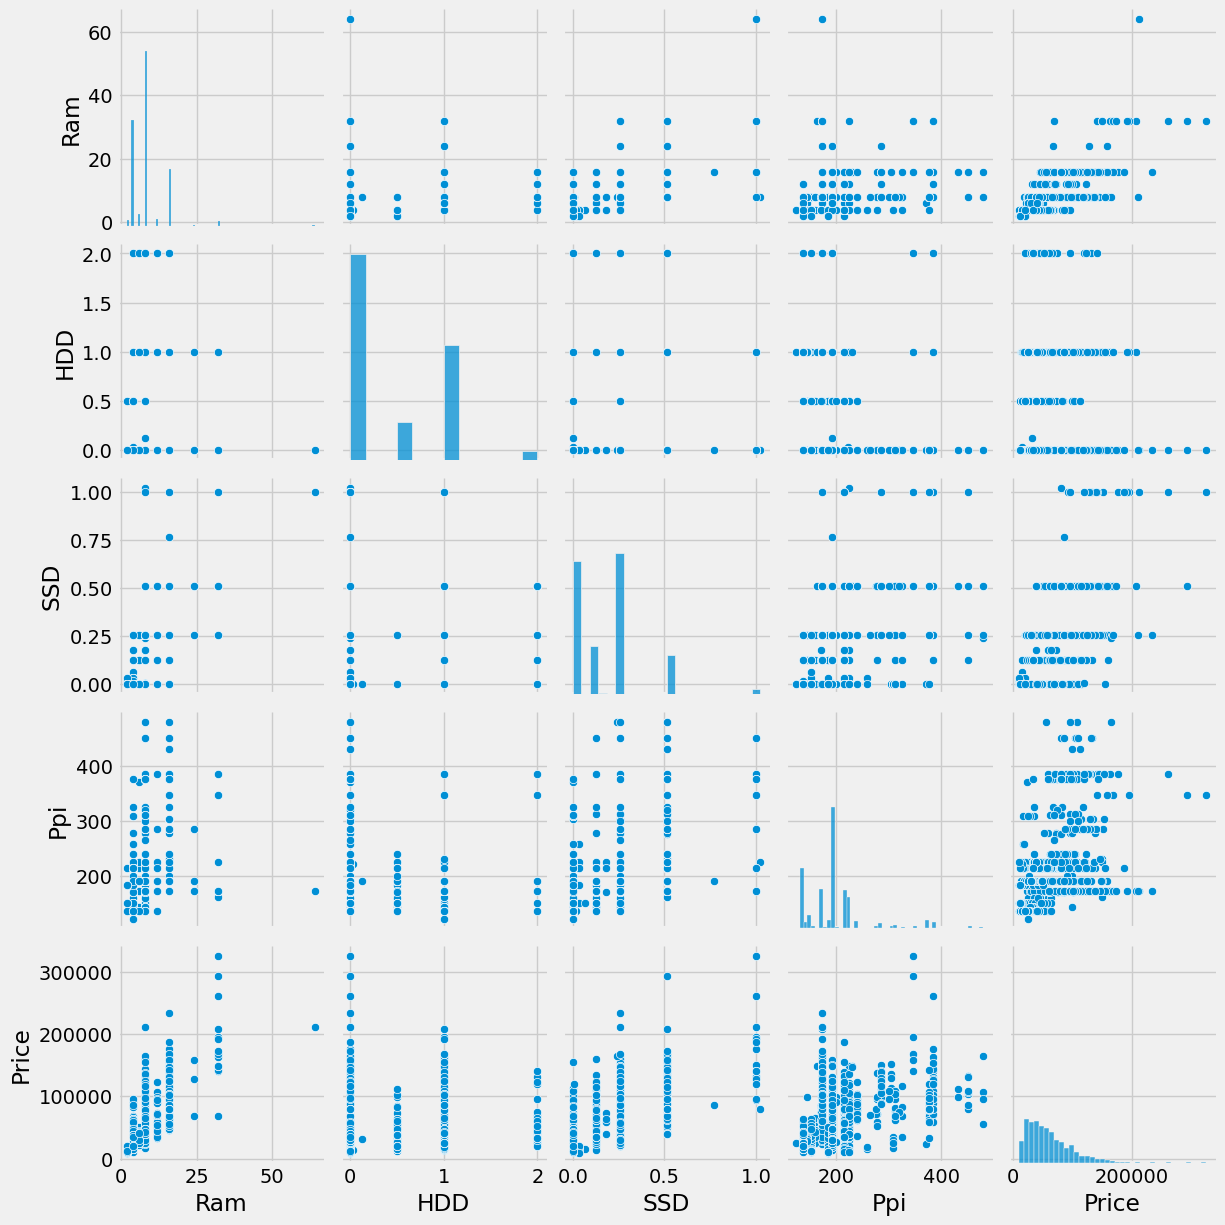

In [78]:
# plt.figure(figsize=(5,5))
sns.pairplot(df[['Ram','HDD','SSD','Ppi','Price']])

In [79]:
# to save data frame 
# df_eda.to_csv('laptop_eda.csv',index=False)